# Weather data Analysis of London

# 1. Data Import and cleaning

## 1.1. Import and clean Weather data

In [5]:
import pandas as pd

# List of files
files = [
    "midas-open_uk-hourly-weather-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2010.csv",
    "midas-open_uk-hourly-weather-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2011.csv",
    "midas-open_uk-hourly-weather-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2012.csv",
    "midas-open_uk-hourly-weather-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2013.csv",
    "midas-open_uk-hourly-weather-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2014.csv",
]

# Columns to select
selected_columns = ["ob_time", "wind_direction", "wind_speed", "air_temperature", "dewpoint", "rltv_hum"]

# Read and process each file
dfs = []
for file in files:
    df = pd.read_csv(file, skiprows=280, na_values="NA", usecols=selected_columns)

    # Drop the last row
    df = df.drop(df.index[-1])

    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Quick check
print(f"Combined DataFrame shape: {combined_df.shape}")
# print(combined_df.head())

# Optional: Save to CSV
# combined_df.to_csv("combined_weather_data_2011_2014_selected.csv", index=False)

Combined DataFrame shape: (43040, 6)


In [6]:
combined_df['ob_time'] = pd.to_datetime(combined_df['ob_time'], format = "%Y-%m-%d %H:%M:%S")

In [7]:
combined_df.head()

ob_time  wind_direction  wind_speed  air_temperature  dewpoint  \
0 2010-01-01 00:00:00           360.0         4.0              1.3      -1.9   
1 2010-01-01 01:00:00            10.0         4.0              1.6      -1.7   
2 2010-01-01 02:00:00           360.0         4.0              1.0      -1.7   
3 2010-01-01 03:00:00            10.0         4.0              1.5      -1.9   
4 2010-01-01 04:00:00           360.0         3.0              0.7      -2.4   

   rltv_hum  
0      79.3  
1      79.6  
2      82.6  
3      77.5  
4      77.8

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ob_time          43040 non-null  datetime64[ns]
 1   wind_direction   41665 non-null  float64       
 2   wind_speed       41664 non-null  float64       
 3   air_temperature  42201 non-null  float64       
 4   dewpoint         42149 non-null  float64       
 5   rltv_hum         42149 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.0 MB


In [9]:
null_values = combined_df.isnull().sum()
null_columns = null_values[null_values > 0]
print(null_columns)

wind_direction     1375
wind_speed         1376
air_temperature     839
dewpoint            891
rltv_hum            891
dtype: int64


In [10]:
print(null_values)

ob_time               0
wind_direction     1375
wind_speed         1376
air_temperature     839
dewpoint            891
rltv_hum            891
dtype: int64


In [11]:
combined_df = combined_df.drop_duplicates(subset=["ob_time"], keep='first').reset_index(drop=True)

In [12]:
# Loop through each column and fill missing values by copying data from the previous year
for col in combined_df.columns:
    for idx, row in combined_df[combined_df[col].isnull()].iterrows():
        # Identify the hour and the day of the missing data
        missing_time = row["ob_time"]
        missing_hour = missing_time.hour
        missing_day = missing_time.day
        missing_month = missing_time.month
        missing_year = missing_time.year

        # Try to get data from the same hour of the previous year
        prev_year_data = combined_df[
            (combined_df["ob_time"].dt.month == missing_month) &
            (combined_df["ob_time"].dt.day == missing_day) &
            (combined_df["ob_time"].dt.year == missing_year - 1) &
            (combined_df["ob_time"].dt.hour == missing_hour)
        ]

        if not prev_year_data.empty:
            # Copy the data from the previous year
            prev_year_value = prev_year_data[col].values[0]
            combined_df.at[idx, col] = prev_year_value
        else:
            # If previous year data is not found, try the next year
            next_year_data = combined_df[
                (combined_df["ob_time"].dt.month == missing_month) &
                (combined_df["ob_time"].dt.day == missing_day) &
                (combined_df["ob_time"].dt.year == missing_year + 1) &
                (combined_df["ob_time"].dt.hour == missing_hour)
            ]

            if not next_year_data.empty:
                # Copy the data from the next year
                next_year_value = next_year_data[col].values[0]
                combined_df.at[idx, col] = next_year_value
            else:
                print(f"No data found for {missing_hour}:00 on {missing_day}-{missing_month}-{missing_year}.")

# Verify if there are any remaining null values
print(combined_df.isnull().sum())

No data found for 0:00 on 29-2-2012.
No data found for 1:00 on 29-2-2012.
No data found for 2:00 on 29-2-2012.
No data found for 3:00 on 29-2-2012.
No data found for 4:00 on 29-2-2012.
No data found for 5:00 on 29-2-2012.
No data found for 6:00 on 29-2-2012.
No data found for 7:00 on 29-2-2012.
No data found for 8:00 on 29-2-2012.
No data found for 9:00 on 29-2-2012.
No data found for 10:00 on 29-2-2012.
No data found for 11:00 on 29-2-2012.
No data found for 12:00 on 29-2-2012.
No data found for 13:00 on 29-2-2012.
No data found for 14:00 on 29-2-2012.
No data found for 15:00 on 29-2-2012.
No data found for 16:00 on 29-2-2012.
No data found for 17:00 on 29-2-2012.
No data found for 0:00 on 29-2-2012.
No data found for 1:00 on 29-2-2012.
No data found for 2:00 on 29-2-2012.
No data found for 3:00 on 29-2-2012.
No data found for 4:00 on 29-2-2012.
No data found for 5:00 on 29-2-2012.
No data found for 6:00 on 29-2-2012.
No data found for 7:00 on 29-2-2012.
No data found for 8:00 on 29-2

In [23]:
# Check if the missing data is on a leap day (29th February) and fill it
for col in combined_df.columns:
    for idx, row in combined_df[combined_df[col].isnull()].iterrows():
        missing_time = row["ob_time"]

        # If the missing time is on 29th February of a leap year (2012)
        if missing_time.month == 2 and missing_time.day == 29:
            # Try to get data from the previous year (2011)
            prev_year_data = combined_df[
                (combined_df["ob_time"].dt.month == missing_time.month) &
                (combined_df["ob_time"].dt.day == missing_time.day) &
                (combined_df["ob_time"].dt.year == missing_time.year - 1) &
                (combined_df["ob_time"].dt.hour == missing_time.hour)
            ]

            if not prev_year_data.empty:
                prev_year_value = prev_year_data[col].values[0]
                combined_df.at[idx, col] = prev_year_value
            else:
                # Fallback to the average for that month and hour
                avg_value = combined_df[
                    (combined_df["ob_time"].dt.month == missing_time.month) &
                    (combined_df["ob_time"].dt.hour == missing_time.hour)
                ][col].mean()

                combined_df.at[idx, col] = avg_value

In [22]:
combined_df = combined_df[(combined_df["ob_time"]>"2011-11-22 23:00:00") & (combined_df["ob_time"]<"2014-02-27 00:00:00")].reset_index(drop=True)

In [15]:
# # Forward fill all N/A datapoints
# for col in combined_df.columns:
#   combined_df.loc[:, col] = combined_df[col].ffill()

# # Verify if there are any remaining null values
# print(combined_df.isnull().sum())

### Handling missing dates

In [16]:
def is_perfect_timeseries_and_fill(df, time_col):
    """
    Check for time gaps in a time series DataFrame and automatically fill them.
    - For gaps, fill using:
        1. Previous year's (T-365 days) data at the same timestamp.
        2. If not available, monthly-hourly average across all years.

    Parameters:
    df (pd.DataFrame): DataFrame with a datetime column.

    Returns:
    pd.DataFrame: Cleaned DataFrame with gaps filled.
    """

    # Ensure datetime column is datetime type
    df[time_col] = pd.to_datetime(df[time_col])

    # Sort and reset index
    df = df.sort_values(by=time_col).reset_index(drop=True)

    # Find time differences
    df['time_diff'] = df[time_col].diff()

    # Expected frequency (assumed mode)
    mode_diff = df['time_diff'].mode()[0]

    # Locate gaps
    gaps = df[df['time_diff'] > mode_diff].index.tolist()

    if not gaps:
        print("Perfect time series detected! ✅")
        return df.drop(columns=['time_diff'])

    print(f"Inconsistent time intervals detected at: {gaps}")

    # Precompute monthly-hourly averages
    df['month'] = df[time_col].dt.month
    df['hour'] = df[time_col].dt.hour

    monthly_hourly_avg = df.groupby(['month', 'hour']).mean(numeric_only=True)

    # Fill gaps
    for idx in reversed(gaps):
        prev_time = df.at[idx-1, time_col]
        current_time = df.at[idx, time_col]
        gap_hours = int((current_time - prev_time) / pd.Timedelta(hours=1)) - 1

        for hour in range(1, gap_hours + 1):
            new_time = prev_time + pd.Timedelta(hours=hour)

            filled_row = None

            # 1. Try previous year data (T-365 days)
            prev_year_time = new_time - pd.Timedelta(days=365)
            prev_year_idx = df[df[time_col] == prev_year_time].index
            if not prev_year_idx.empty:
                filled_row = df.iloc[prev_year_idx[0]].copy()
                filled_row[time_col] = new_time

            else:
                # 2. Fallback to monthly average for this hour
                month = new_time.month
                hour = new_time.hour

                if (month, hour) in monthly_hourly_avg.index:
                    filled_row = monthly_hourly_avg.loc[(month, hour)].copy()
                    filled_row[time_col] = new_time
                else:
                    print(f"No data found for {new_time}, even after fallbacks.")
                    continue

            # Insert the filled row into the DataFrame
            new_row = pd.DataFrame([filled_row])
            df = pd.concat([df.iloc[:idx], new_row, df.iloc[idx:]]).reset_index(drop=True)
            idx += 1  # Move forward to account for inserted row

    # Drop helper columns
    df = df.drop(columns=['time_diff', 'month', 'hour'])

    # Final check
    if is_perfect_timeseries(df, time_col):
        print("All gaps filled successfully! ✅")
    else:
        print("Some gaps could not be filled. ⚠️")

    return df




def is_perfect_timeseries(df, time_col):
    """
    Check whether a dataset is a perfect time series (fixed frequency).
    Prints any detected issues (duplicates or inconsistent intervals).
    """

    # Check for duplicates
    duplicates = df[df[time_col].duplicated(keep='first')]
    if not duplicates.empty:
        print("Duplicate timestamps found (extra occurrences shown):")
        print(duplicates[[time_col]])
        return False

    # Sort and calculate time differences
    df = df.sort_values(by=time_col).reset_index(drop=True)
    inferred_freq = pd.infer_freq(df[time_col])

    if inferred_freq is None:
        print("Inconsistent time intervals detected.")

        df["time_diff"] = df[time_col].diff()

        inconsistent_rows = df.loc[df["time_diff"] != df["time_diff"].mode()[0], ["time_diff"]].iloc[1:]

        if not inconsistent_rows.empty:
            print("Time gaps detected at these positions:")
            print(inconsistent_rows)

        return False

    return True

In [17]:
is_perfect_timeseries(combined_df, "ob_time")

Inconsistent time intervals detected.
Time gaps detected at these positions:
            time_diff
1978  0 days 02:00:00
2652  0 days 03:00:00
3806  0 days 02:00:00
3823  0 days 02:00:00
6474  0 days 02:00:00
7058  0 days 07:00:00
10126 0 days 02:00:00
11163 0 days 02:00:00
11750 0 days 02:00:00


False

In [18]:
cleaned_df = is_perfect_timeseries_and_fill(combined_df, "ob_time")
is_perfect_timeseries(cleaned_df, "ob_time")

Inconsistent time intervals detected at: [1978, 2652, 3806, 3823, 6474, 7058, 10126, 11163, 11750]
All gaps filled successfully! ✅


True

In [19]:
len(cleaned_df)

19848

In [20]:
is_perfect_timeseries(cleaned_df, "ob_time")

True

In [21]:
min(cleaned_df["ob_time"]), max(cleaned_df["ob_time"])

(Timestamp('2011-11-23 00:00:00'), Timestamp('2014-02-26 23:00:00'))

## 1.2. Import and clean Rain data

In [24]:
# File paths
rain_files = [
    "midas-open_uk-hourly-rain-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2011.csv",
    "midas-open_uk-hourly-rain-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2012.csv",
    "midas-open_uk-hourly-rain-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2013.csv",
    "midas-open_uk-hourly-rain-obs_dv-201901_greater-london_00723_kew-gardens_qcv-1_2014.csv"
]

# Columns to keep (adjust if you only need some of them)
selected_columns = ["ob_end_time", "prcp_amt"]

# Read, select columns, and drop last row for each file
rain_dfs = []
for file in rain_files:
    df = pd.read_csv(file, skiprows=61, na_values="NA", usecols=selected_columns)

    # Drop the last row
    df = df.drop(df.index[-1])

    rain_dfs.append(df)

# Combine all the DataFrames into one
combined_rain_df = pd.concat(rain_dfs, ignore_index=True)

# Check combined result
print(f"Combined Rain DataFrame shape: {combined_rain_df.shape}")

Combined Rain DataFrame shape: (34130, 2)


### 2011

In [25]:
rain_11 = pd.read_csv(rain_files[0], skiprows=61, na_values="NA", usecols=selected_columns)
rain_11 = rain_11.drop(rain_11.index[-1])
rain_11["ob_end_time"] = pd.to_datetime(rain_11["ob_end_time"], format="%Y-%m-%d %H:%M:%S")
rain_11 = rain_11[rain_11["ob_end_time"]>"2011-11-22 23:00:00"].reset_index(drop=True)
rain_11.head()

ob_end_time  prcp_amt
0 2011-11-23 00:00:00       0.0
1 2011-11-23 01:00:00       0.0
2 2011-11-23 02:00:00       0.0
3 2011-11-23 03:00:00       0.0
4 2011-11-23 04:00:00       0.0

In [26]:
is_perfect_timeseries(rain_11, "ob_end_time")

Duplicate timestamps found (extra occurrences shown):
             ob_end_time
10   2011-11-23 09:00:00
23   2011-11-23 21:00:00
36   2011-11-24 09:00:00
49   2011-11-24 21:00:00
62   2011-11-25 09:00:00
...                  ...
959  2011-12-29 21:00:00
972  2011-12-30 09:00:00
985  2011-12-30 21:00:00
998  2011-12-31 09:00:00
1011 2011-12-31 21:00:00

[78 rows x 1 columns]


False

In [27]:
rain_11 = rain_11.drop_duplicates(subset=["ob_end_time"], keep='first').reset_index(drop=True)

In [28]:
rain_11 = is_perfect_timeseries_and_fill(df=rain_11, time_col="ob_end_time")

Perfect time series detected! ✅


In [29]:
len(rain_11)

936

### 2012, 2013 and 2014 and merge with 2011

In [30]:
# Read, select columns, and drop last row for each file
rain_dfs = [rain_11]
for file in rain_files[1:]:
    df = pd.read_csv(file, skiprows=61, na_values="NA", usecols=selected_columns)

    # Drop the last row
    df = df.drop(df.index[-1])

    rain_dfs.append(df)

# Combine all the DataFrames into one
combined_rain_df = pd.concat(rain_dfs, ignore_index=True)

# Check combined result
print(f"Combined Rain DataFrame shape: {combined_rain_df.shape}")

Combined Rain DataFrame shape: (25983, 2)


In [31]:
combined_rain_df["ob_end_time"] = pd.to_datetime(combined_rain_df["ob_end_time"], format="%Y-%m-%d %H:%M:%S")

In [32]:
combined_rain_df = combined_rain_df[combined_rain_df['ob_end_time']<"2014-02-27 00:00:00"].reset_index(drop=True)

In [33]:
combined_rain_df = combined_rain_df.drop_duplicates(subset=["ob_end_time"], keep='first').reset_index(drop=True)

In [34]:
is_perfect_timeseries(combined_rain_df, "ob_end_time")

Inconsistent time intervals detected.
Time gaps detected at these positions:
             time_diff
1762   1 days 00:00:00
1763   1 days 00:00:00
1836   1 days 00:00:00
1837   1 days 00:00:00
1886   0 days 02:00:00
2560   0 days 03:00:00
3203   1 days 00:00:00
3204   1 days 00:00:00
3205   1 days 00:00:00
3206   0 days 12:00:00
3207   0 days 12:00:00
3208   1 days 00:00:00
3600   0 days 02:00:00
3617   0 days 02:00:00
6268   0 days 02:00:00
6854   1 days 00:00:00
8823   1 days 00:00:00
8824   1 days 00:00:00
9857   1 days 00:00:00
9858   1 days 00:00:00
9859   1 days 00:00:00
9860   1 days 00:00:00
10773 31 days 00:00:00
10774  0 days 12:00:00
10775  0 days 12:00:00
10776  0 days 12:00:00
10777  0 days 12:00:00
10778  0 days 12:00:00
10779  0 days 12:00:00
10780  0 days 12:00:00
10781  0 days 12:00:00
10782  0 days 12:00:00
15091  1 days 00:00:00


False

In [35]:
cleaned_rain_df = is_perfect_timeseries_and_fill(combined_rain_df, "ob_end_time")

Inconsistent time intervals detected at: [1762, 1763, 1836, 1837, 1886, 2560, 3203, 3204, 3205, 3206, 3207, 3208, 3600, 3617, 6268, 6854, 8823, 8824, 9857, 9858, 9859, 9860, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780, 10781, 10782, 15091]
All gaps filled successfully! ✅


In [36]:
is_perfect_timeseries(cleaned_rain_df, "ob_end_time")

True

In [37]:
len(cleaned_rain_df)

19848

## 1.3. Merging weather and rain data

In [38]:
len(cleaned_df), len(cleaned_rain_df)

(19848, 19848)

In [39]:
# Merge rainfall data into the main dataset
merged_df = cleaned_df.merge(
    cleaned_rain_df[["ob_end_time", "prcp_amt"]],
    left_on="ob_time",
    right_on="ob_end_time",
    how="left"
)

# Drop the redundant `ob_end_time` column after merging
merged_df.drop(columns=["ob_end_time"], inplace=True)

In [40]:
merged_df.head()

ob_time  wind_direction  wind_speed  air_temperature  dewpoint  \
0 2011-11-23 00:00:00           270.0         1.0              4.6       4.0   
1 2011-11-23 01:00:00           320.0         1.0              3.6       3.1   
2 2011-11-23 02:00:00           310.0         2.0              3.7       3.3   
3 2011-11-23 03:00:00           280.0         2.0              4.5       4.2   
4 2011-11-23 04:00:00           240.0         2.0              2.4       2.0   

   rltv_hum  prcp_amt  
0      95.2       0.0  
1      96.6       0.0  
2      96.6       0.0  
3      98.3       0.0  
4      96.4       0.0

In [41]:
len(merged_df)

19848

# 2. Visual and Statical Exploratory Analysis

In [63]:
visual_df=merged_df.copy()

In [43]:
visual_df.iloc[:,1:].describe()

wind_direction    wind_speed  air_temperature      dewpoint  \
count    19848.000000  19848.000000     19848.000000  19848.000000   
mean       196.686193      4.755590        10.164923      6.187184   
std         89.311082      2.672804         6.187569      5.247929   
min          0.000000      0.000000        -8.100000    -11.400000   
25%        140.000000      3.000000         5.900000      2.300000   
50%        210.000000      4.000000         9.800000      6.300000   
75%        250.000000      6.000000        14.300000     10.300000   
max        360.000000     21.000000        33.000000     20.800000   

           rltv_hum      prcp_amt  
count  19848.000000  19846.000000  
mean      78.064614      0.149442  
std       15.147270      0.907610  
min       18.500000      0.000000  
25%       68.600000      0.000000  
50%       81.100000      0.000000  
75%       90.600000      0.000000  
max      100.000000     52.500000

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
parameter_dict = {
    "ob_time": "Time of the year",
    "wind_direction": "Wind Direction",
    "wind_speed": "Wind Speed",
    "air_temperature": "Air Temperature",
    "dewpoint": "Dewpoint",
    "prcp_amt": "Precipitation",
    "rltv_hum": "Relative Humidity"
}

## Defining classes and fuctions

### WeatherPlotter

In [46]:
class WeatherPlotter:
    def __init__(self, df, time_col="ob_time", parameter_dict=None):
        """
        Initialize the WeatherPlotter class with a dataframe and column mappings.
        """
        self.df = df.copy()  # Work with a copy to avoid modifying the original
        self.time_col = time_col
        self.parameter_dict = parameter_dict if parameter_dict else {}

        # Convert time column to datetime if it's not already
        self.df[self.time_col] = pd.to_datetime(self.df[self.time_col])

    def _aggregate_data(self, parameter, freq):
        """
        Aggregate data based on the given frequency.
        """
        temp_df = self.df.copy()
        temp_df["period"] = temp_df[self.time_col].dt.to_period(freq)  # Convert to period
        aggregated = temp_df.groupby("period")[parameter].mean()
        return aggregated.index.to_timestamp(), aggregated.values  # Convert period index to timestamp

    def plot(self, parameter="air_temperature", frequencies=None, title=None):
        """
        Plots the parameter over different time scales based on user selection.

        :param parameter: The weather parameter to plot.
        :param frequencies: List of time frequencies to plot. Options: ["hourly", "daily", "weekly", "monthly"]
        :param title: Custom title for the plot.
        """
        if frequencies is None:
            frequencies = ["hourly", "daily", "weekly", "monthly"]

        plt.figure(figsize=(30, 9), dpi=300)

        # Line styles and colors
        styles = {
            "hourly": {"linestyle": "-", "color": "blue", "alpha": 0.2, "label": "Hourly Data"},
            "daily": {"linestyle": "-", "color": "green", "alpha": 1.0, "label": "Daily Avg"},
            "weekly": {"linestyle": "--", "color": "orange", "alpha": 1.0, "label": "Weekly Avg"},
            "monthly": {"linestyle": "-.", "color": "red", "alpha": 1.0, "label": "Monthly Avg"},
        }

        # Plot each selected frequency
        if "hourly" in frequencies:
            plt.plot(self.df[self.time_col], self.df[parameter], **styles["hourly"])

        if "daily" in frequencies:
            x, y = self._aggregate_data(parameter, "D")
            plt.plot(x, y, **styles["daily"])

        if "weekly" in frequencies:
            x, y = self._aggregate_data(parameter, "W")
            plt.plot(x, y, **styles["weekly"])

        if "monthly" in frequencies:
            x, y = self._aggregate_data(parameter, "M")
            plt.plot(x, y, **styles["monthly"])

        # Labels, title, and legend
        plt.xlabel("Time of the year")
        plt.ylabel(self.parameter_dict.get(parameter, parameter))
        plt.title(title if title else f"Plotting {self.parameter_dict.get(parameter, parameter)} Over Time")
        plt.grid(axis="y", alpha = 0.3)
        plt.grid(axis="x", alpha = 0.1)
        plt.legend()
        plt.show()

### RangePlotter

In [47]:
class RangePlotter:
    def __init__(self, df, time_col="ob_time", parameter_dict=None):
        """
        Initialize the class with the dataframe and the column for plotting.
        """
        self.df = df.copy()
        self.time_col = time_col
        self.parameter_dict = parameter_dict if parameter_dict else {}

        # Ensure the time column is in datetime format
        self.df[self.time_col] = pd.to_datetime(self.df[self.time_col])

        # Add a 'date' column to the DataFrame for aggregation
        self.df['date'] = self.df[self.time_col].dt.date

    def _aggregate_data(self, parameter, freq):
        """
        Aggregate data based on the given frequency (daily, weekly, or monthly).
        """
        temp_df = self.df.copy()
        temp_df["period"] = temp_df[self.time_col].dt.to_period(freq)  # Convert to period
        min_values = temp_df.groupby("period")[parameter].min()
        max_values = temp_df.groupby("period")[parameter].max()
        return min_values.index.to_timestamp(), min_values.values, max_values.index.to_timestamp(), max_values.values

    def plot(self, parameter= "air_temperature", frequencies=None):
        """
        Plot the difference between daily minimum and maximum values.

        :param parameter: The parameter to plot (e.g., "dewpoint", "air_temperature").
        :param frequencies: List of time frequencies to plot. Options: ["daily", "weekly", "monthly"]
        """
        if frequencies is None:
            frequencies = ["daily"]  # Default to daily frequency if none specified

        plt.figure(figsize=(30, 9))

        # Plot each selected frequency
        for freq in frequencies:
            if freq == "daily":
                x_min, y_min, x_max, y_max = self._aggregate_data(parameter, "D")
                plt.plot(x_min, y_max - y_min, label=f'Daily Range ({parameter_dict[parameter]})', linestyle='-', color='purple')
            elif freq == "weekly":
                x_min, y_min, x_max, y_max = self._aggregate_data(parameter, "W")
                plt.plot(x_min, y_max - y_min, label=f'Weekly Range ({parameter_dict[parameter]})', linestyle='-', color='orange')
            elif freq == "monthly":
                x_min, y_min, x_max, y_max = self._aggregate_data(parameter, "M")
                plt.plot(x_min, y_max - y_min, label=f'Monthly Range ({parameter_dict[parameter]})', linestyle='-', color='red')

        # Labels and title
        plt.xlabel("Time")
        plt.ylabel(f'{parameter_dict[parameter]} Range (°C)')
        plt.title(f'Range of {parameter_dict[parameter]} Over Time')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()


### PlotAccumulator

In [84]:
class PlotAccumulation:
  def __init__(self, df, time_col="ob_time", parameter="prcp_amt", frequencies=None, parameter_dict=parameter_dict):
    self.df = df.copy()
    self.time_col = time_col
    self.parameter = parameter
    self.frequencies = frequencies
    self.parameter_dict = parameter_dict if parameter_dict else {}

    # Ensure the time column is in datetime format
    self.df[self.time_col] = pd.to_datetime(self.df[self.time_col])

    # Add a 'date' column to the DataFrame for cumilation
    self.df['date'] = self.df[self.time_col].dt.date

  def _cumilation(self, parameter, frequency):
    rain_df = self.df.copy()
    rain_df["period"] = rain_df[self.time_col].dt.to_period(frequency)  # Convert to period
    rain_cumilation = rain_df.groupby("period")[parameter].sum()
    return rain_cumilation.index.to_timestamp(), rain_cumilation.values


  def plot_precipation(self, df, parameter="prcp_amt",time_col="ob_time", frequencies=None):

    if frequencies is None:
      frequencies = ["daily"]


    plt.figure(figsize=(30,9), dpi=300)

    for freq in frequencies:

      if freq == "hourly":
        plt.plot(df[time_col], df[parameter], linestyle='-', color='blue', label="Hourly Data")

      elif freq == "daily":
        x, y = self._cumilation(parameter, "D")
        plt.plot(x, y, label=f'Daily Total ({self.parameter_dict.get(parameter, parameter)})', linestyle='-', color='blue')

      elif freq == "weekly":
        x, y = self._cumilation(parameter, "W")
        plt.plot(x, y, label = f"Weekly Total ({self.parameter_dict.get(parameter, parameter)})", linestyle='-', color='blue')

      elif freq == "monthly":
        x, y = self._cumilation(parameter, "M")
        plt.plot(x, y, label = f"Monthly Total ({self.parameter_dict.get(parameter, parameter)})", linestyle='-', color='blue')

    # Labels and title
    plt.xlabel("Time")
    plt.ylabel(f'{self.parameter_dict.get(parameter, parameter)}')
    plt.title(f'{self.parameter_dict.get(parameter, parameter)} Over Time ({freq})')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


### StdDevPlotter

In [49]:
class StdDevPlotter:
    def __init__(self, df, time_col="ob_time", parameter_dict=None):
        """
        Initialize the class with the dataframe and the column for plotting.
        """
        self.df = df.copy()
        self.time_col = time_col
        self.parameter_dict = parameter_dict if parameter_dict else {}

        # Ensure the time column is in datetime format
        self.df[self.time_col] = pd.to_datetime(self.df[self.time_col])

        # Add a 'date' column to the DataFrame for aggregation
        self.df['date'] = self.df[self.time_col].dt.date

    def _aggregate_data(self, parameter, freq):
        """
        Aggregate data based on the given frequency (daily, weekly, or monthly) and compute the standard deviation.
        """
        temp_df = self.df.copy()
        temp_df["period"] = temp_df[self.time_col].dt.to_period(freq)  # Convert to period
        std_dev = temp_df.groupby("period")[parameter].std()
        return std_dev.index.to_timestamp(), std_dev.values

    def plot(self, parameter="air_temperature", frequencies=None):
        """
        Plot the standard deviation of the parameter over different time frequencies.

        :param parameter: The parameter to plot (e.g., "dewpoint", "air_temperature").
        :param frequencies: List of time frequencies to plot. Options: ["daily", "weekly", "monthly"]
        """
        if frequencies is None:
            frequencies = ["daily"]  # Default to daily frequency if none specified

        plt.figure(figsize=(30, 9))

        # Plot each selected frequency
        for freq in frequencies:
            if freq == "daily":
                x, y = self._aggregate_data(parameter, "D")
                plt.plot(x, y, label=f'Daily StdDev ({self.parameter_dict.get(parameter, parameter)})', linestyle='-', color='blue')
            elif freq == "weekly":
                x, y = self._aggregate_data(parameter, "W")
                plt.plot(x, y, label=f'Weekly StdDev ({self.parameter_dict.get(parameter, parameter)})', linestyle='-', color='green')
            elif freq == "monthly":
                x, y = self._aggregate_data(parameter, "M")
                plt.plot(x, y, label=f'Monthly StdDev ({self.parameter_dict.get(parameter, parameter)})', linestyle='-', color='red')

        # Labels and title
        plt.xlabel("Time")
        plt.ylabel(f'Standard Deviation of {self.parameter_dict.get(parameter, parameter)}')
        plt.title(f'Standard Deviation of {self.parameter_dict.get(parameter, parameter)} Over Time')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()



### Compare parameters

In [50]:
def compare_parameters(parameter1, parameter2, df=merged_df, P3=None, P4=None, frequency="D"):
    """
    Compare up to four weather parameters over time at a specified frequency.

    :param parameter1: First parameter to compare (Required).
    :param parameter2: Second parameter to compare (Required).
    :param df: DataFrame containing weather data (Default: merged_df).
    :param P3: Optional third parameter.
    :param P4: Optional fourth parameter.
    :param frequency: Frequency of aggregation ('D' for daily, 'W' for weekly, etc.).
    """
    weather_plotter = WeatherPlotter(df, parameter_dict=parameter_dict)

    # List of selected parameters
    parameters = [parameter1, parameter2, P3, P4]
    parameters = [p for p in parameters if p]  # Remove None values

    # Define line styles and colors
    styles = ["-", "--", "-.", ":"]
    colors = ["blue", "orange", "green", "red"]

    plt.figure(figsize=(30, 9))

    for i, param in enumerate(parameters):
        x, y = weather_plotter._aggregate_data(param, frequency)
        plt.plot(x, y, linestyle=styles[i], color=colors[i], label=parameter_dict.get(param, param))

    # Labels and title
    plt.xlabel("Time")
    plt.ylabel("Parameter Values")
    plt.title(f"Comparison of {', '.join([parameter_dict.get(p, p) for p in parameters])} Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

## 2.1. Temperature

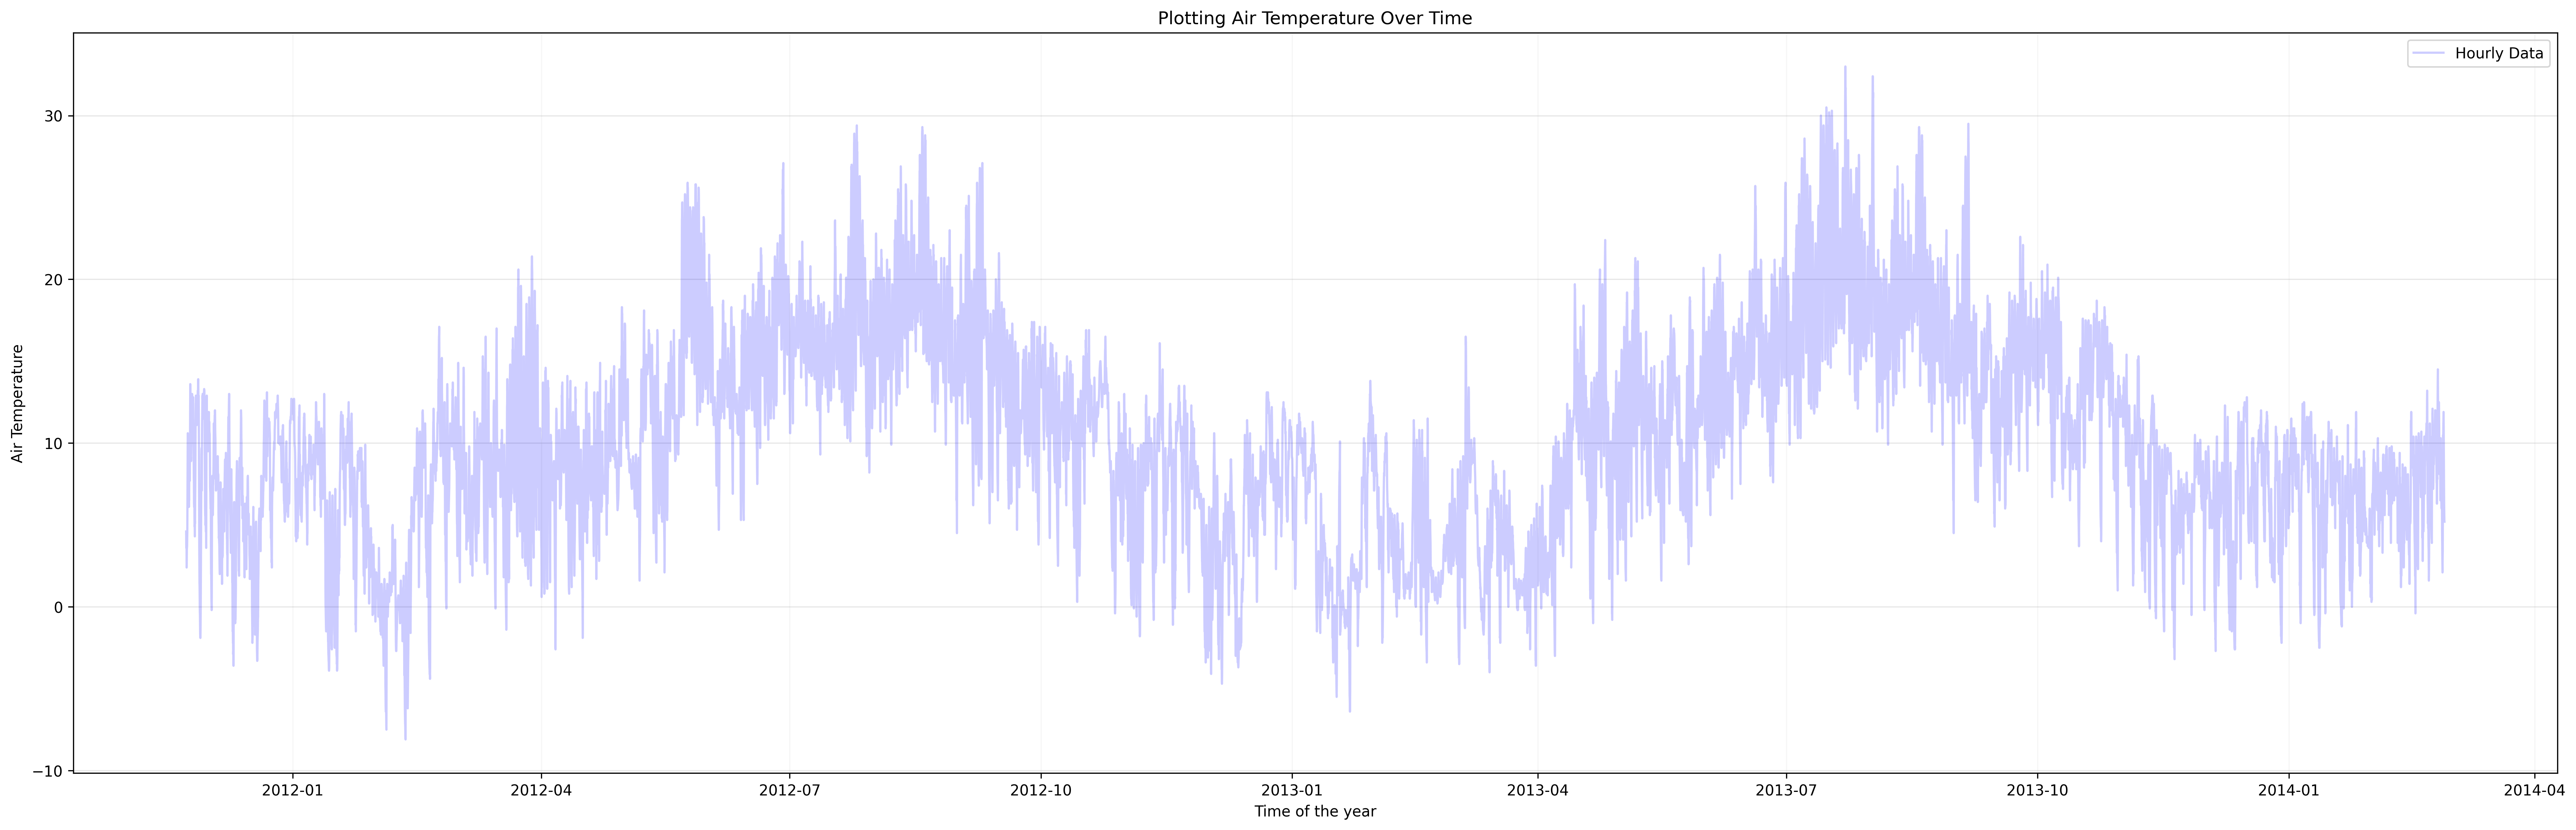

In [67]:
weather_plotter = WeatherPlotter(visual_df, time_col= "ob_time", parameter_dict=parameter_dict)
# frequencies = ["hourly", "daily", "weekly", "monthly"]
# for freq in frequencies:
#     weather_plotter.plot(frequencies=[freq])
weather_plotter.plot(frequencies=["hourly"])

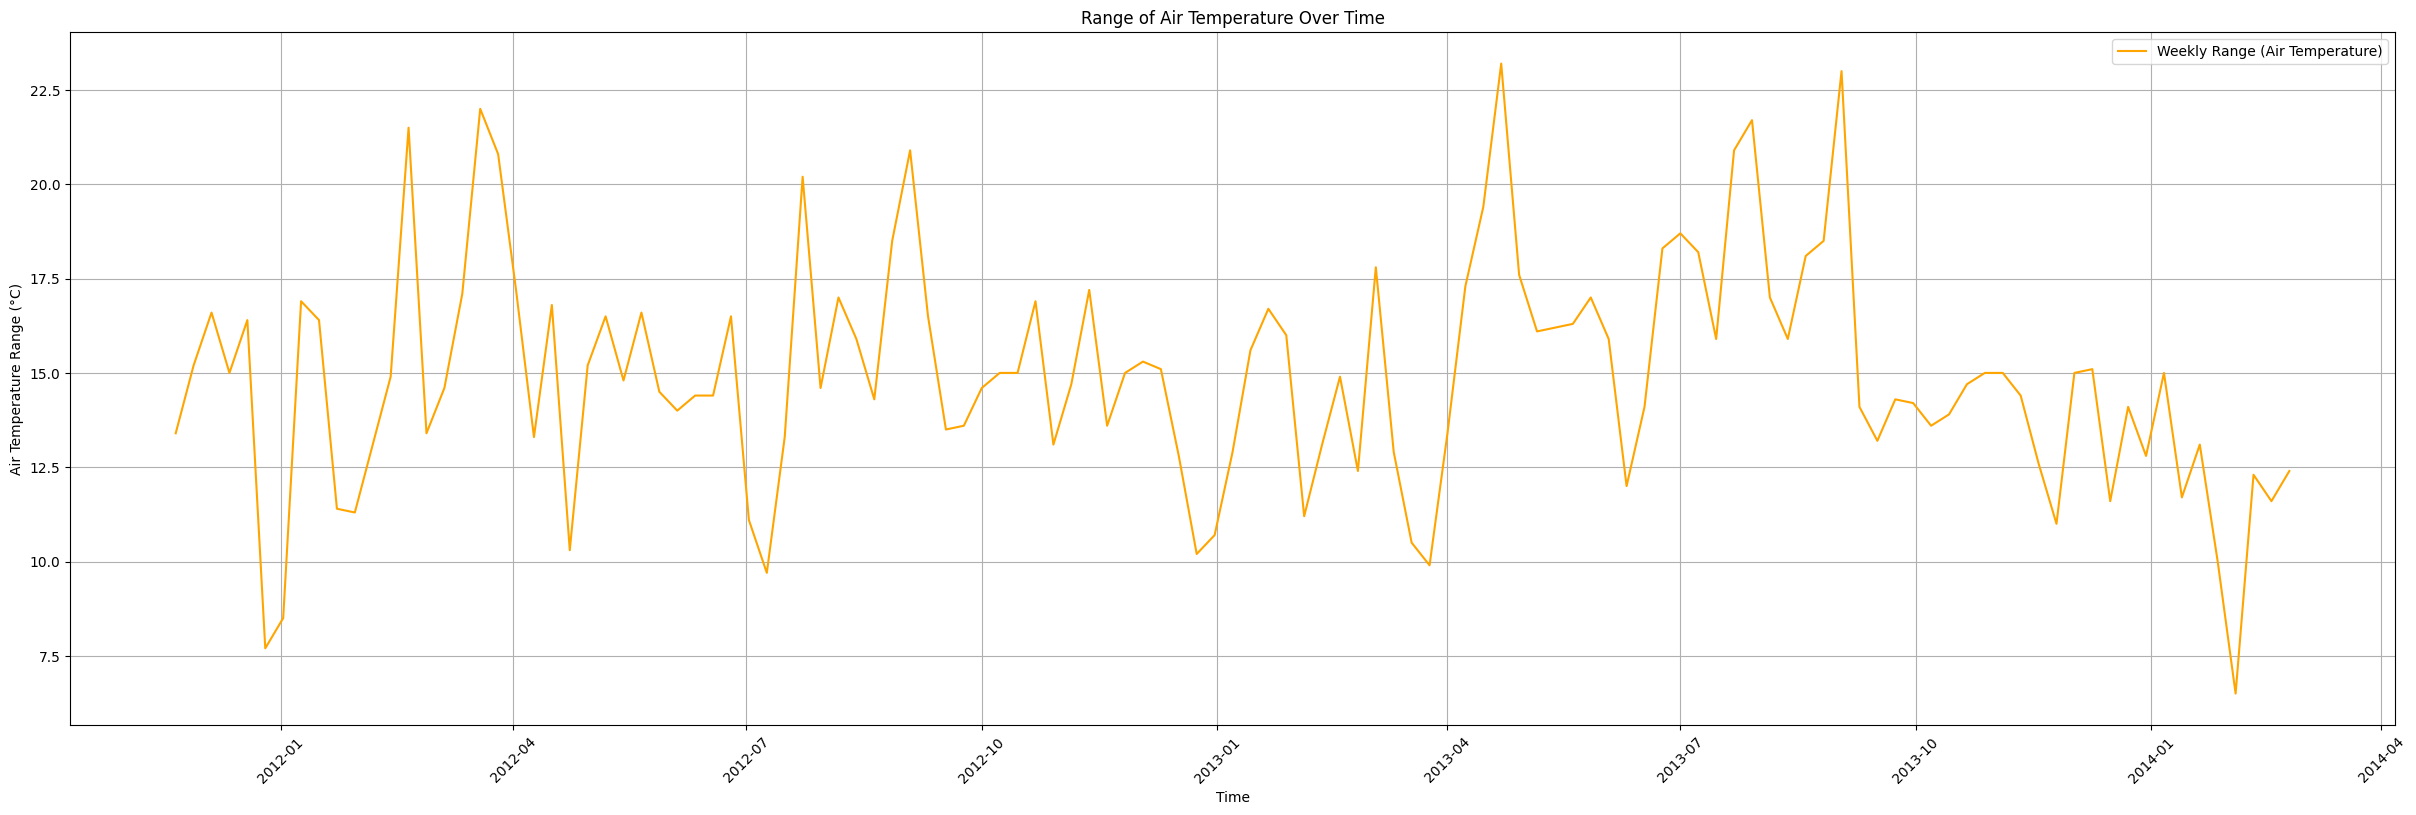

In [75]:
range_plotter=RangePlotter(visual_df, time_col= "ob_time", parameter_dict=parameter_dict)
range_plotter.plot(parameter="air_temperature", frequencies=["weekly"])

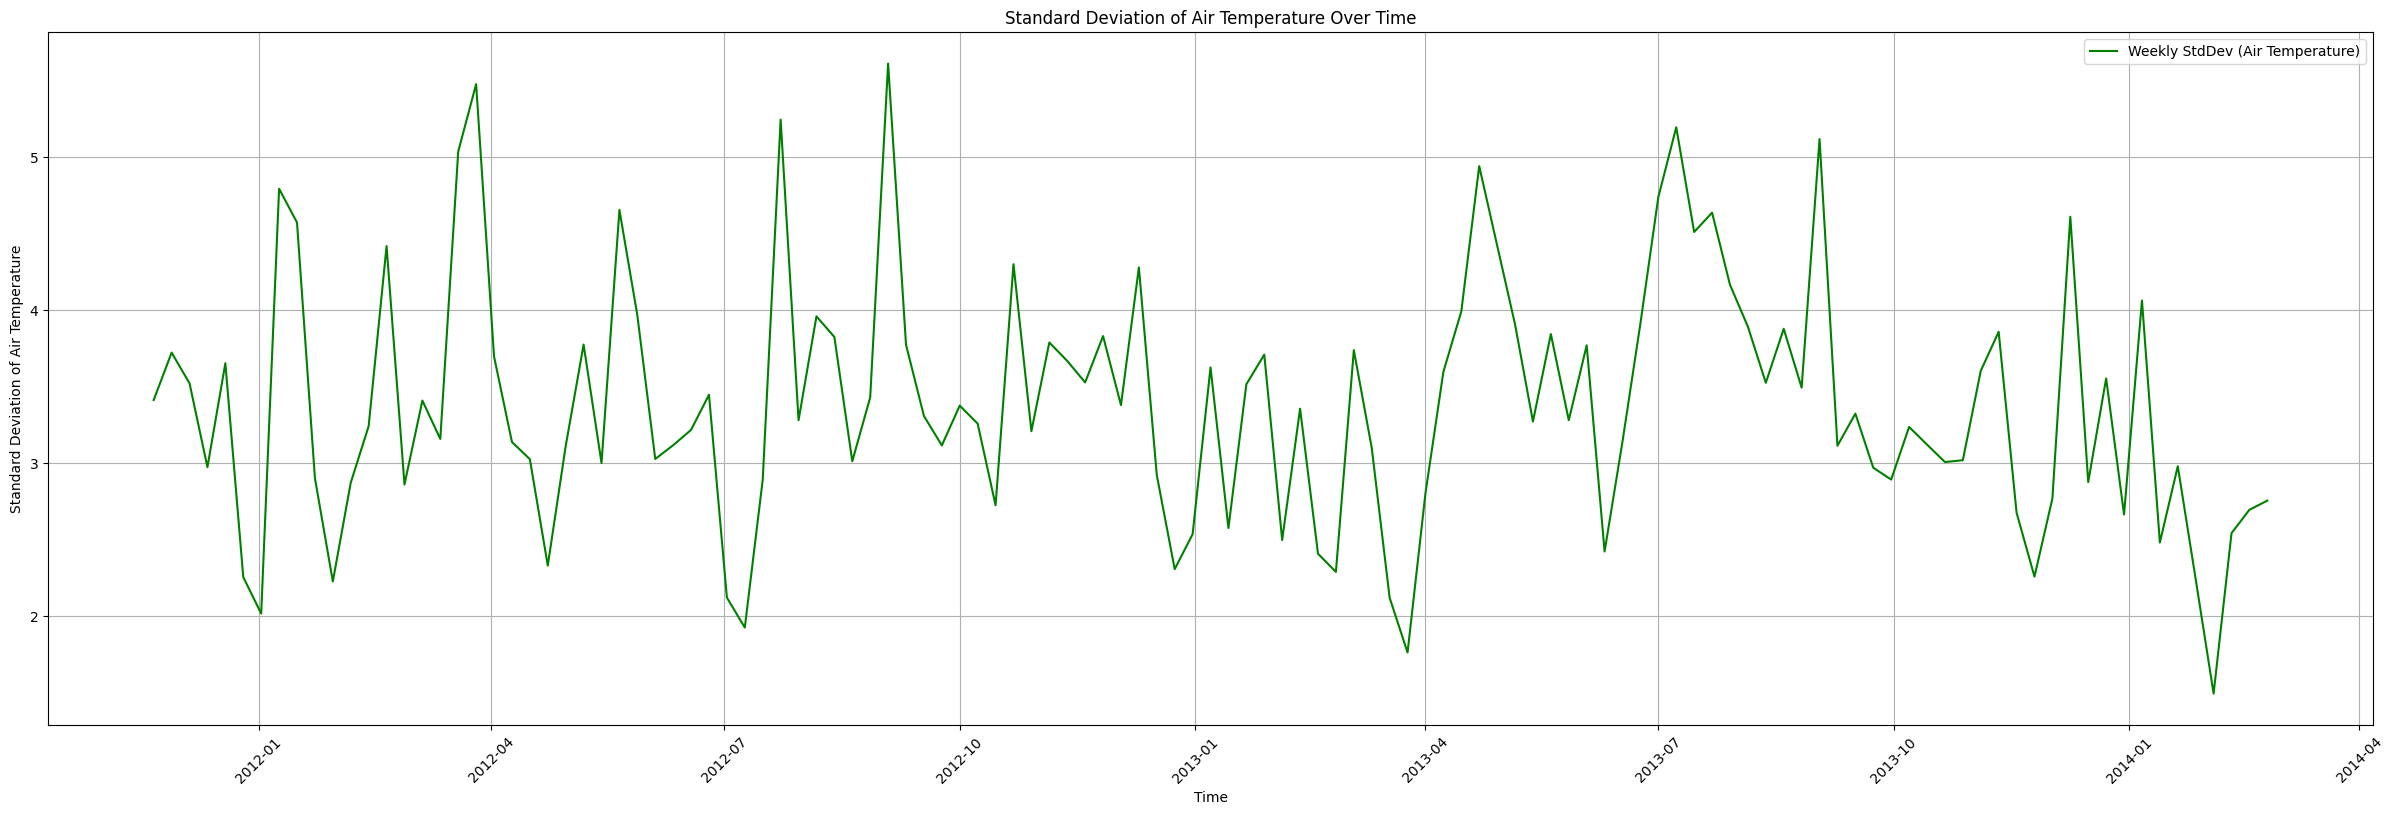

In [76]:
stdev_plotter = StdDevPlotter(visual_df, time_col= "ob_time", parameter_dict=parameter_dict)
stdev_plotter.plot(parameter="air_temperature", frequencies=["weekly"])

## 2.2. Dew Point

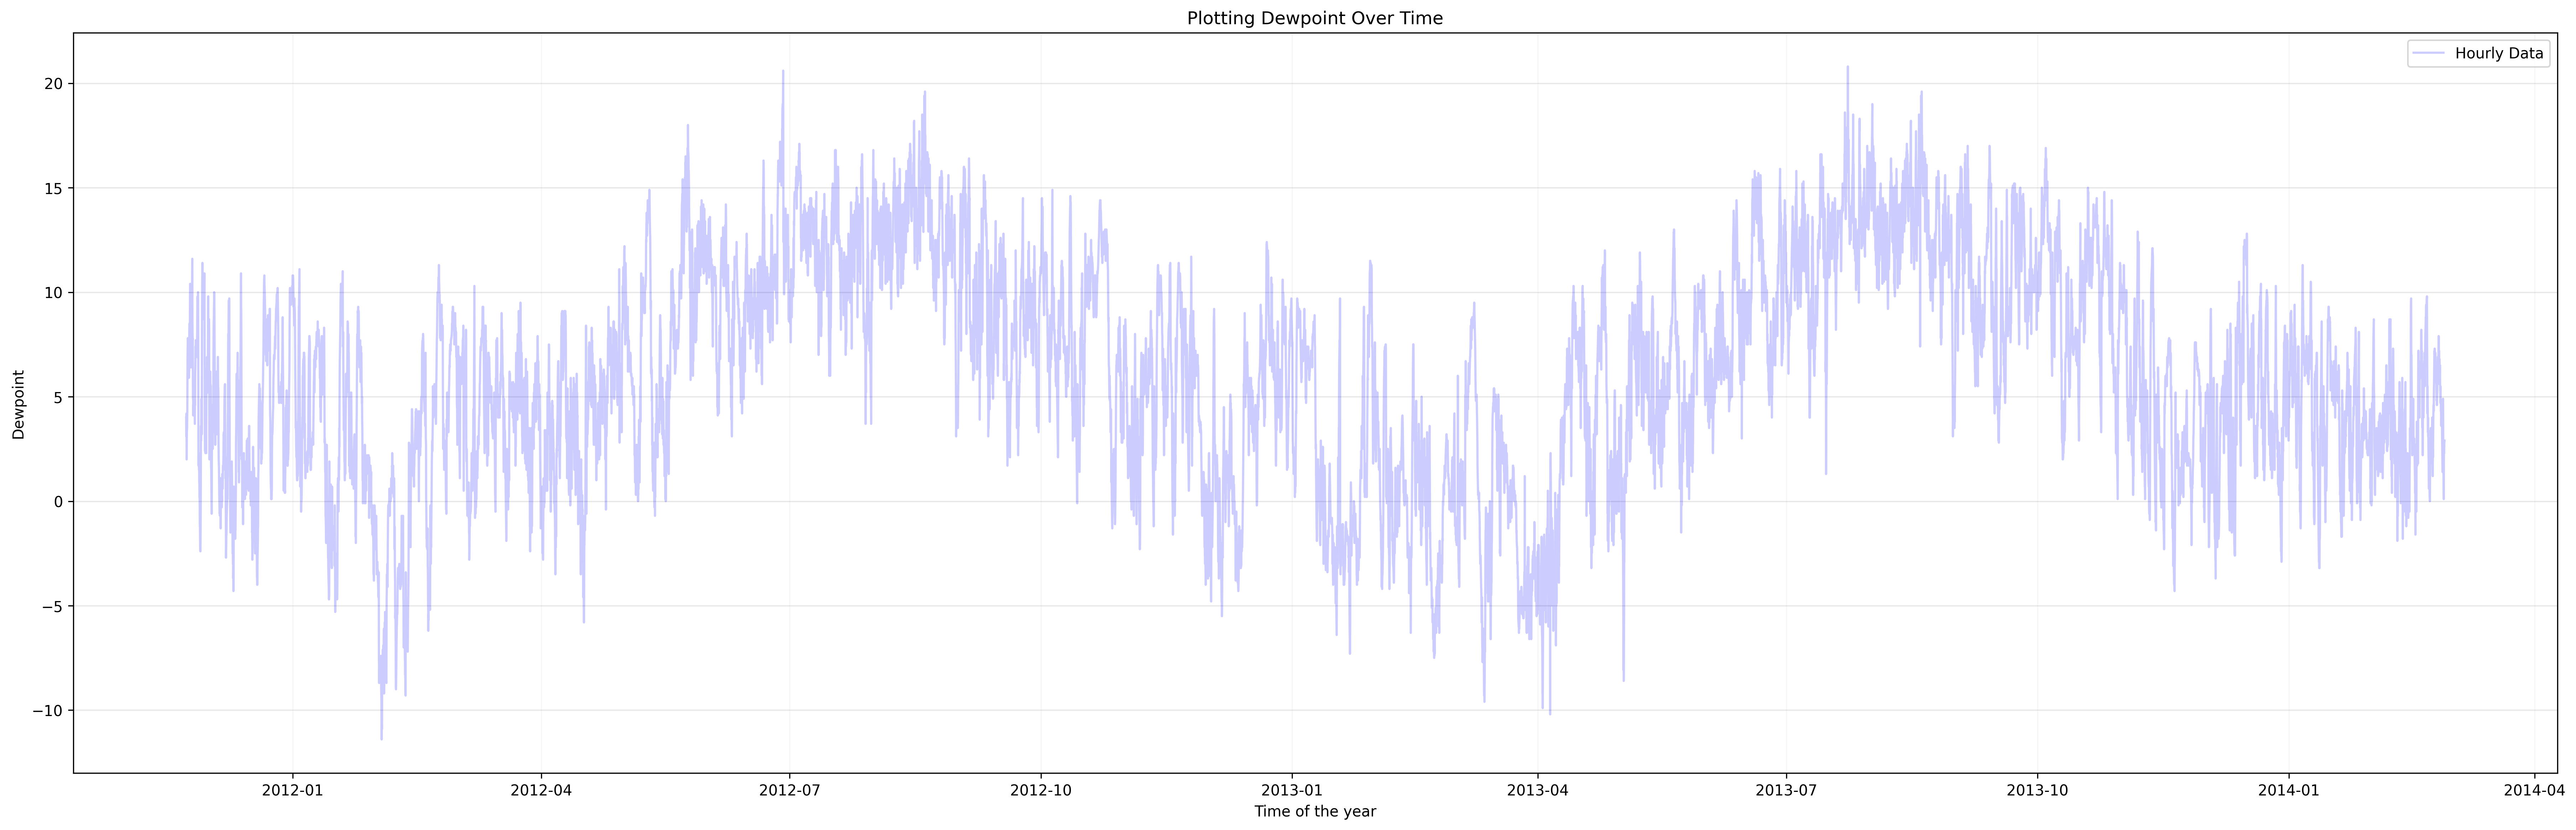

In [72]:
weather_plotter.plot(parameter="dewpoint",frequencies=["hourly"])

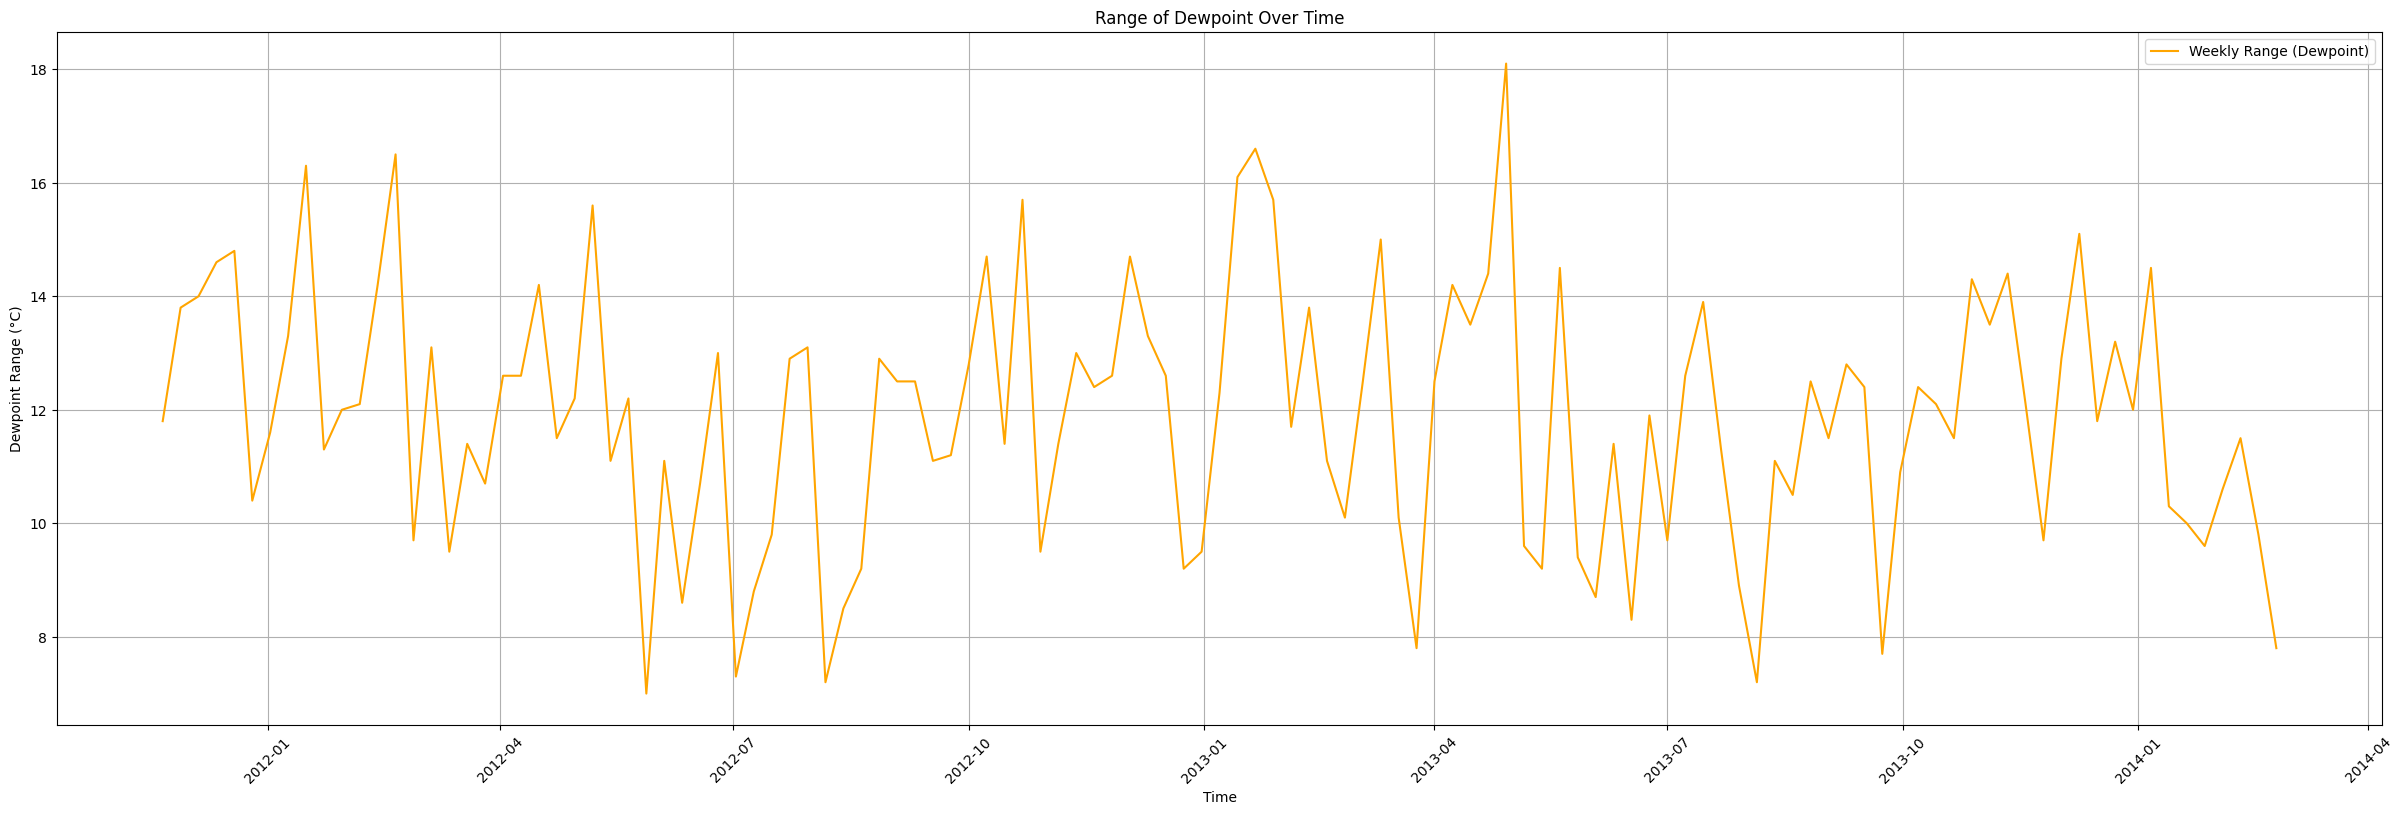

In [77]:
range_plotter.plot(parameter="dewpoint", frequencies=["weekly"])

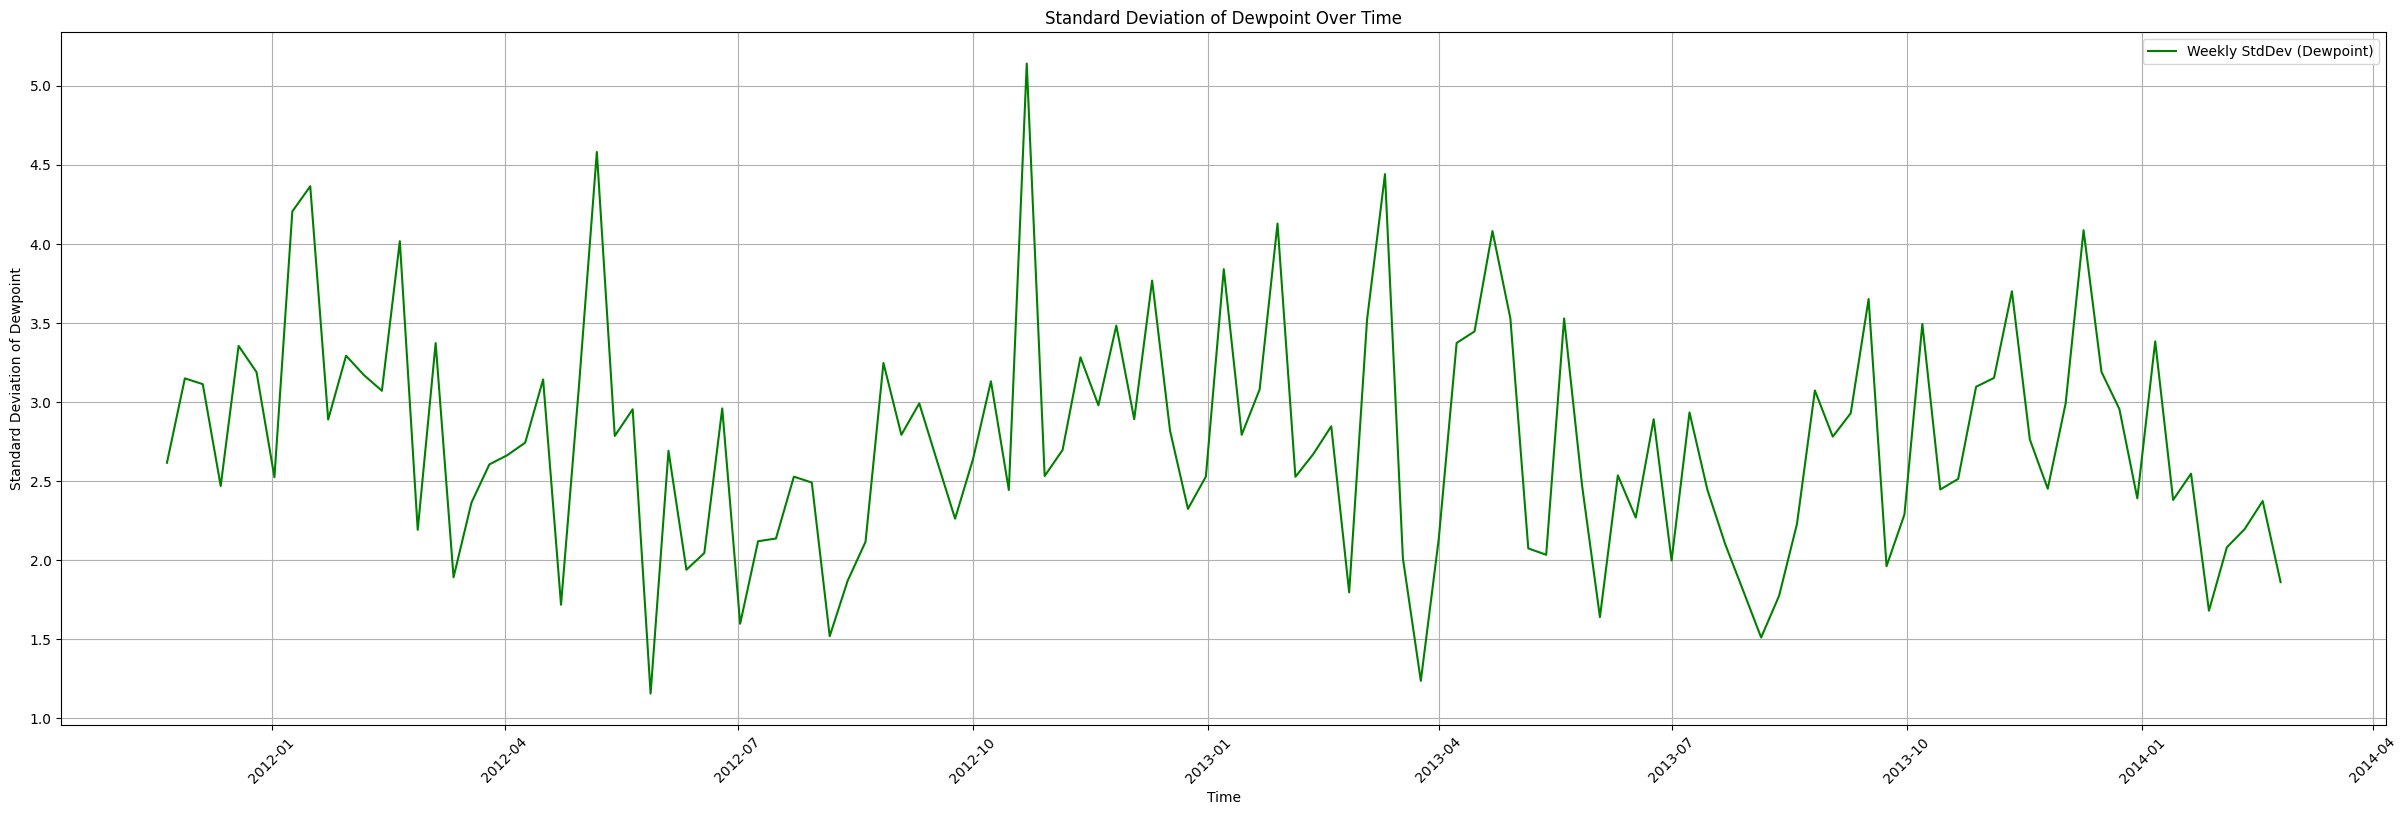

In [60]:
stdev_plotter = StdDevPlotter(visual_df, time_col= "ob_time", parameter_dict=parameter_dict)
stdev_plotter.plot(parameter="dewpoint", frequencies=["weekly"])

## 2.3. Precipation

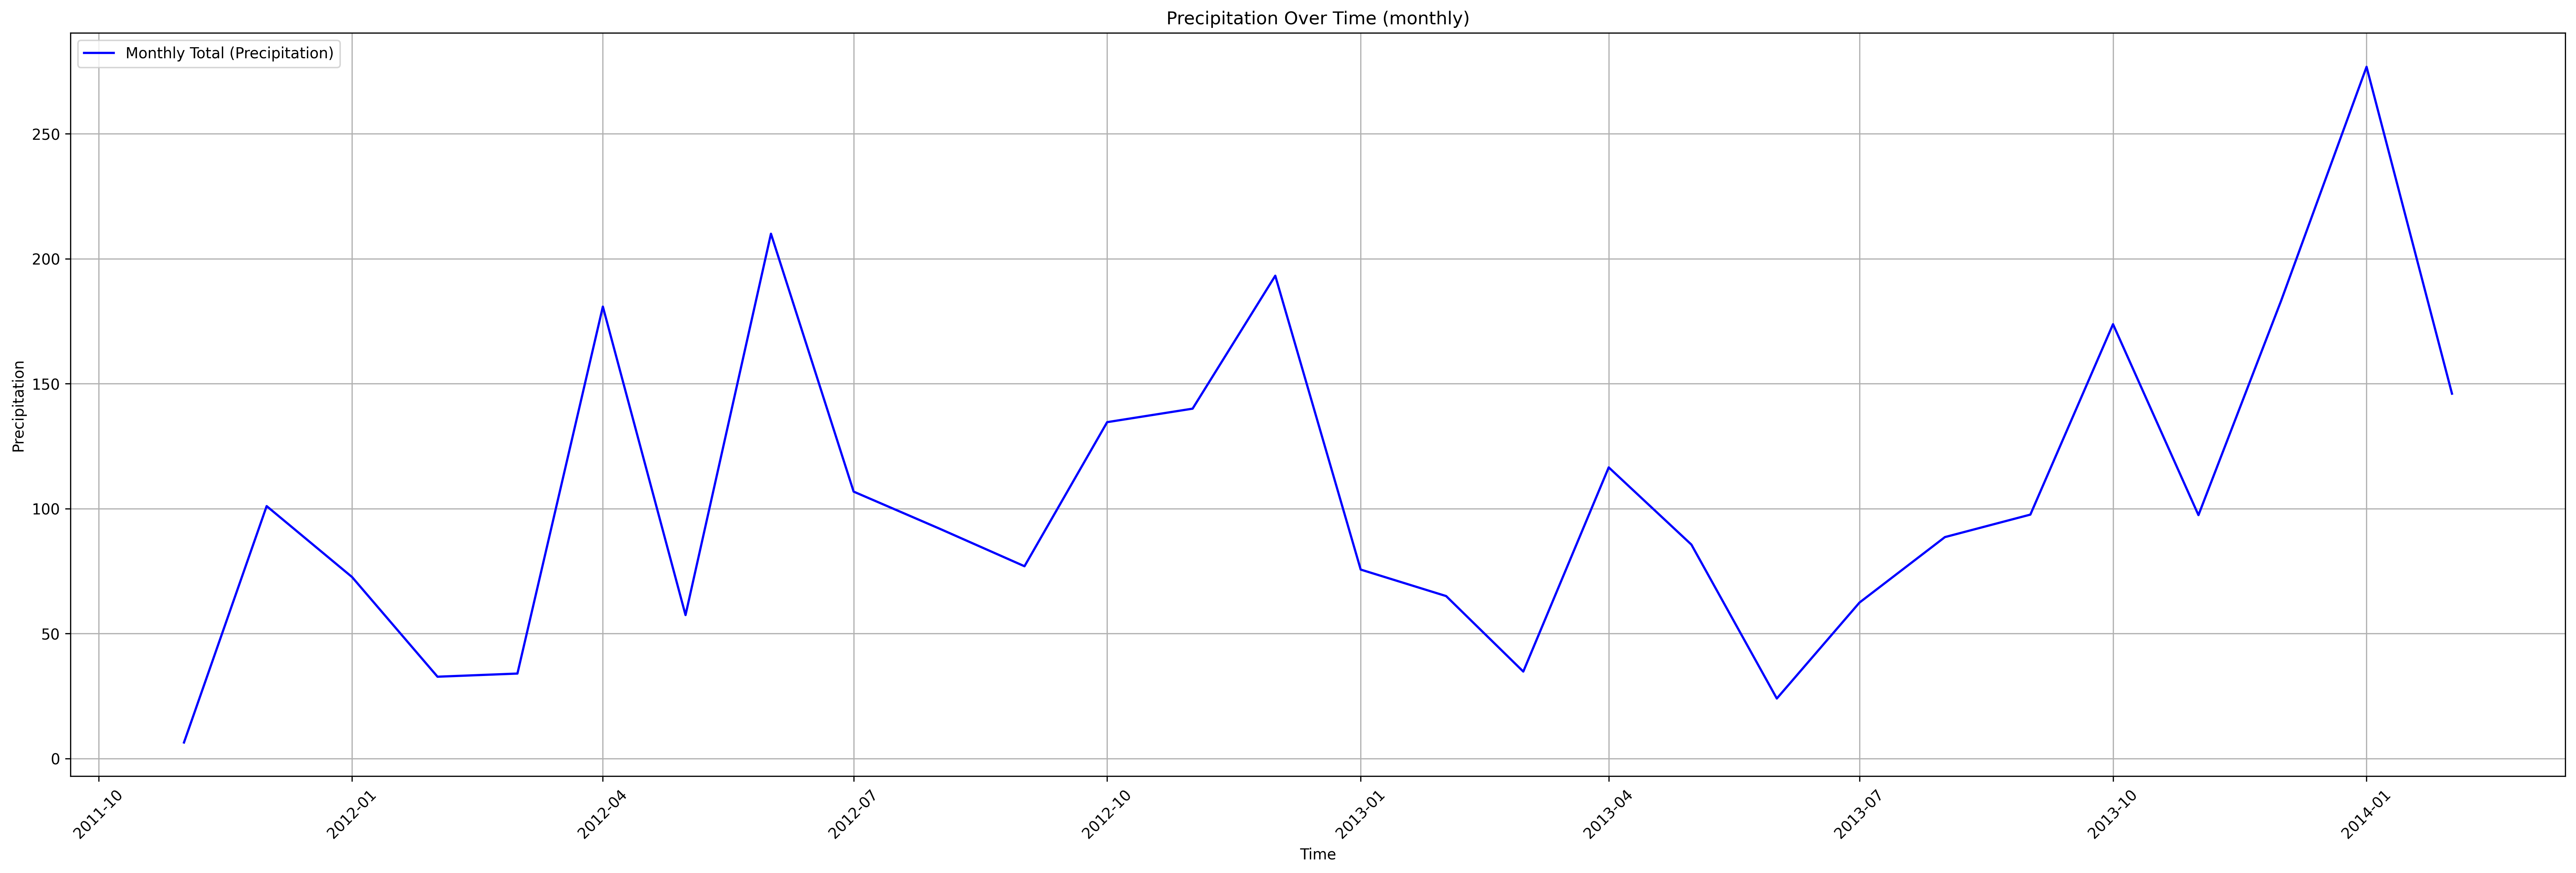

In [85]:
accumulation_plotter = PlotAccumulation(visual_df, time_col= "ob_time", parameter="prcp_amt", frequencies=None, parameter_dict=parameter_dict)
accumulation_plotter.plot_precipation(cleaned_df, parameter="prcp_amt", frequencies=["monthly"])

## 2.4. Relative Humidity

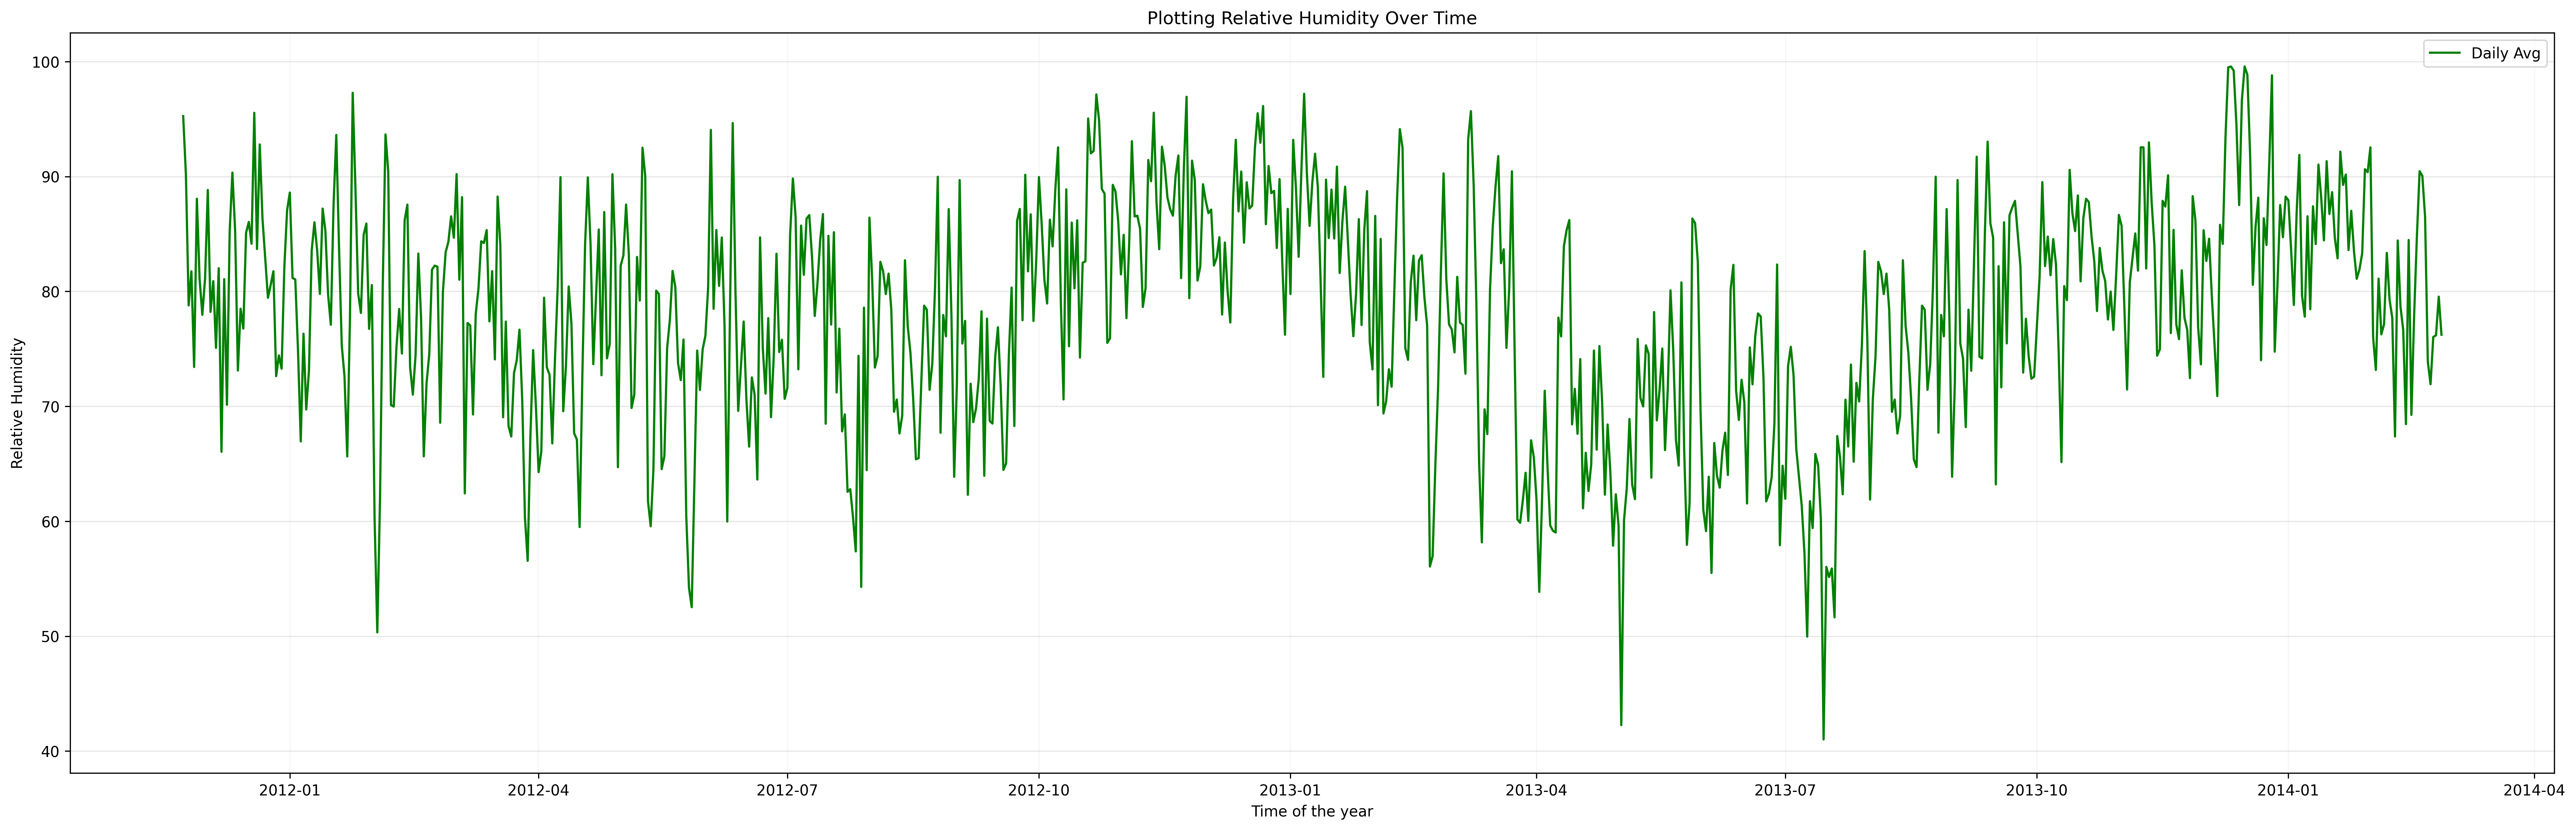

In [98]:
weather_plotter.plot(parameter="rltv_hum", frequencies=["daily"])

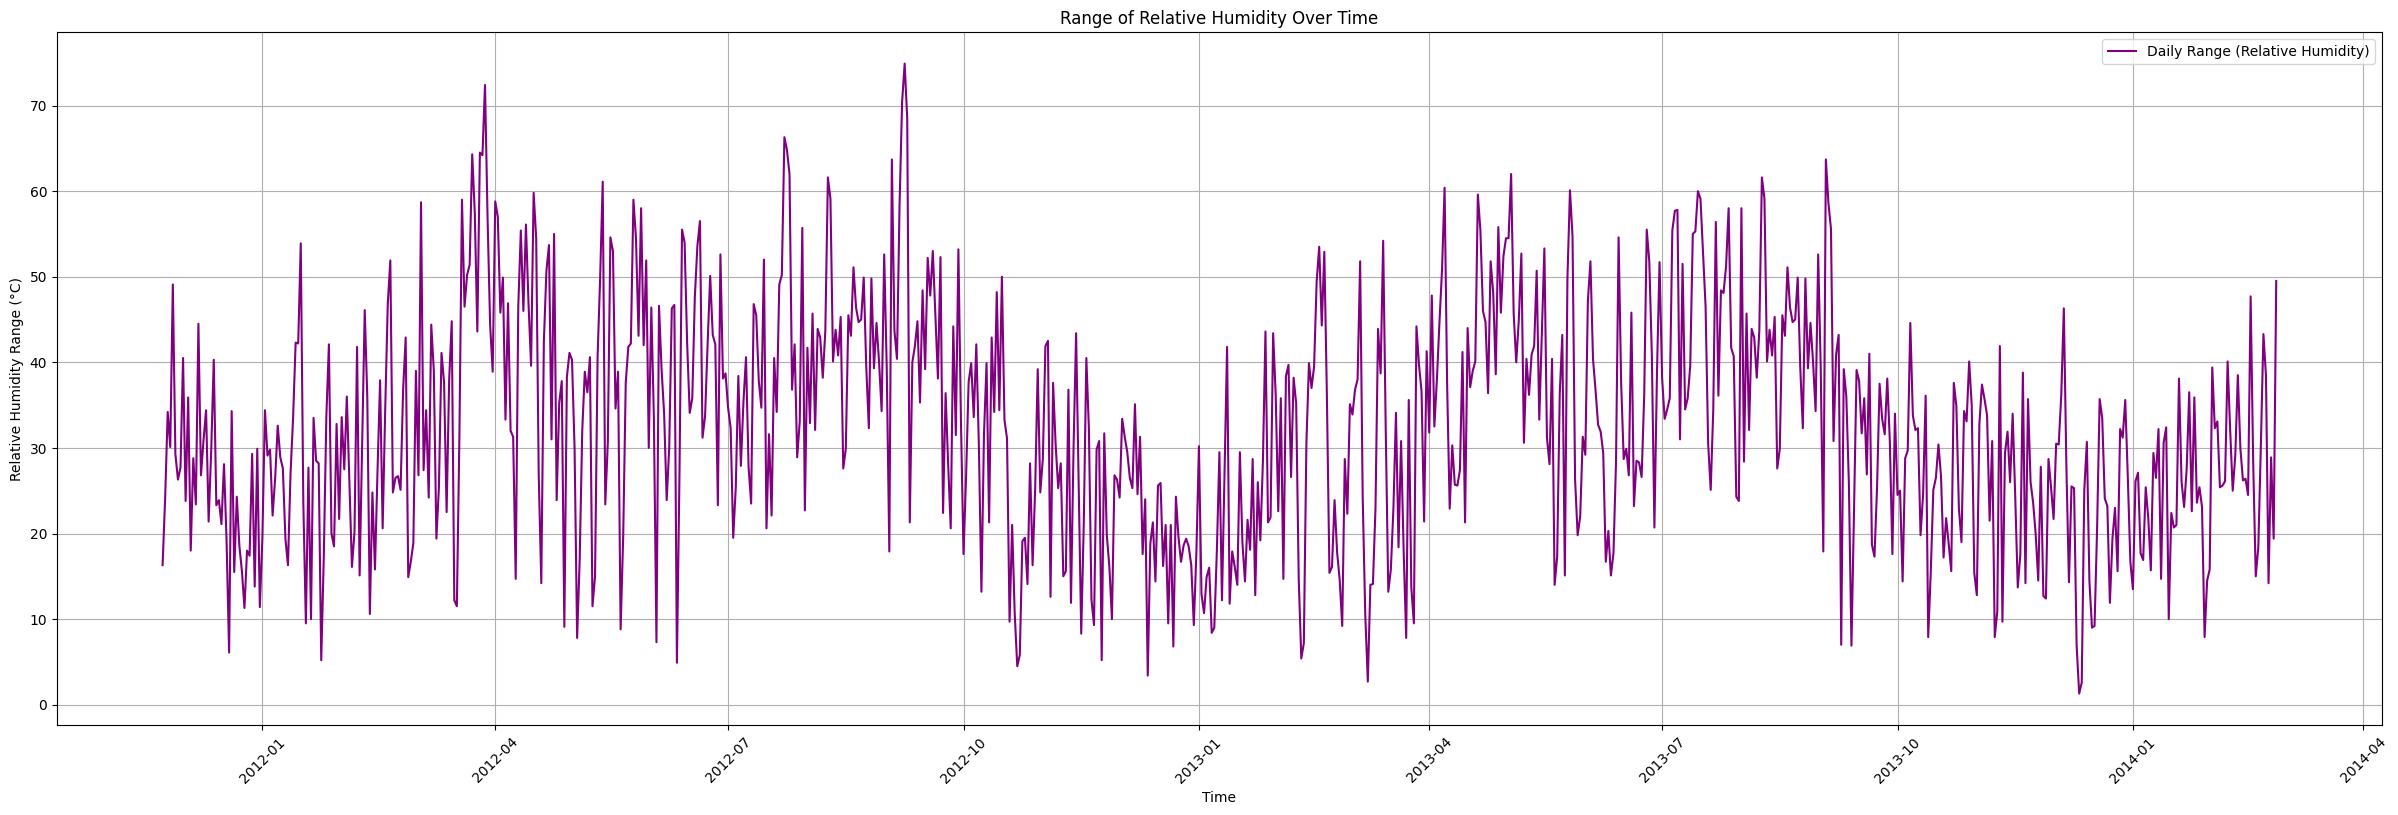

In [97]:
range_plotter.plot(parameter="rltv_hum", frequencies=["daily"])

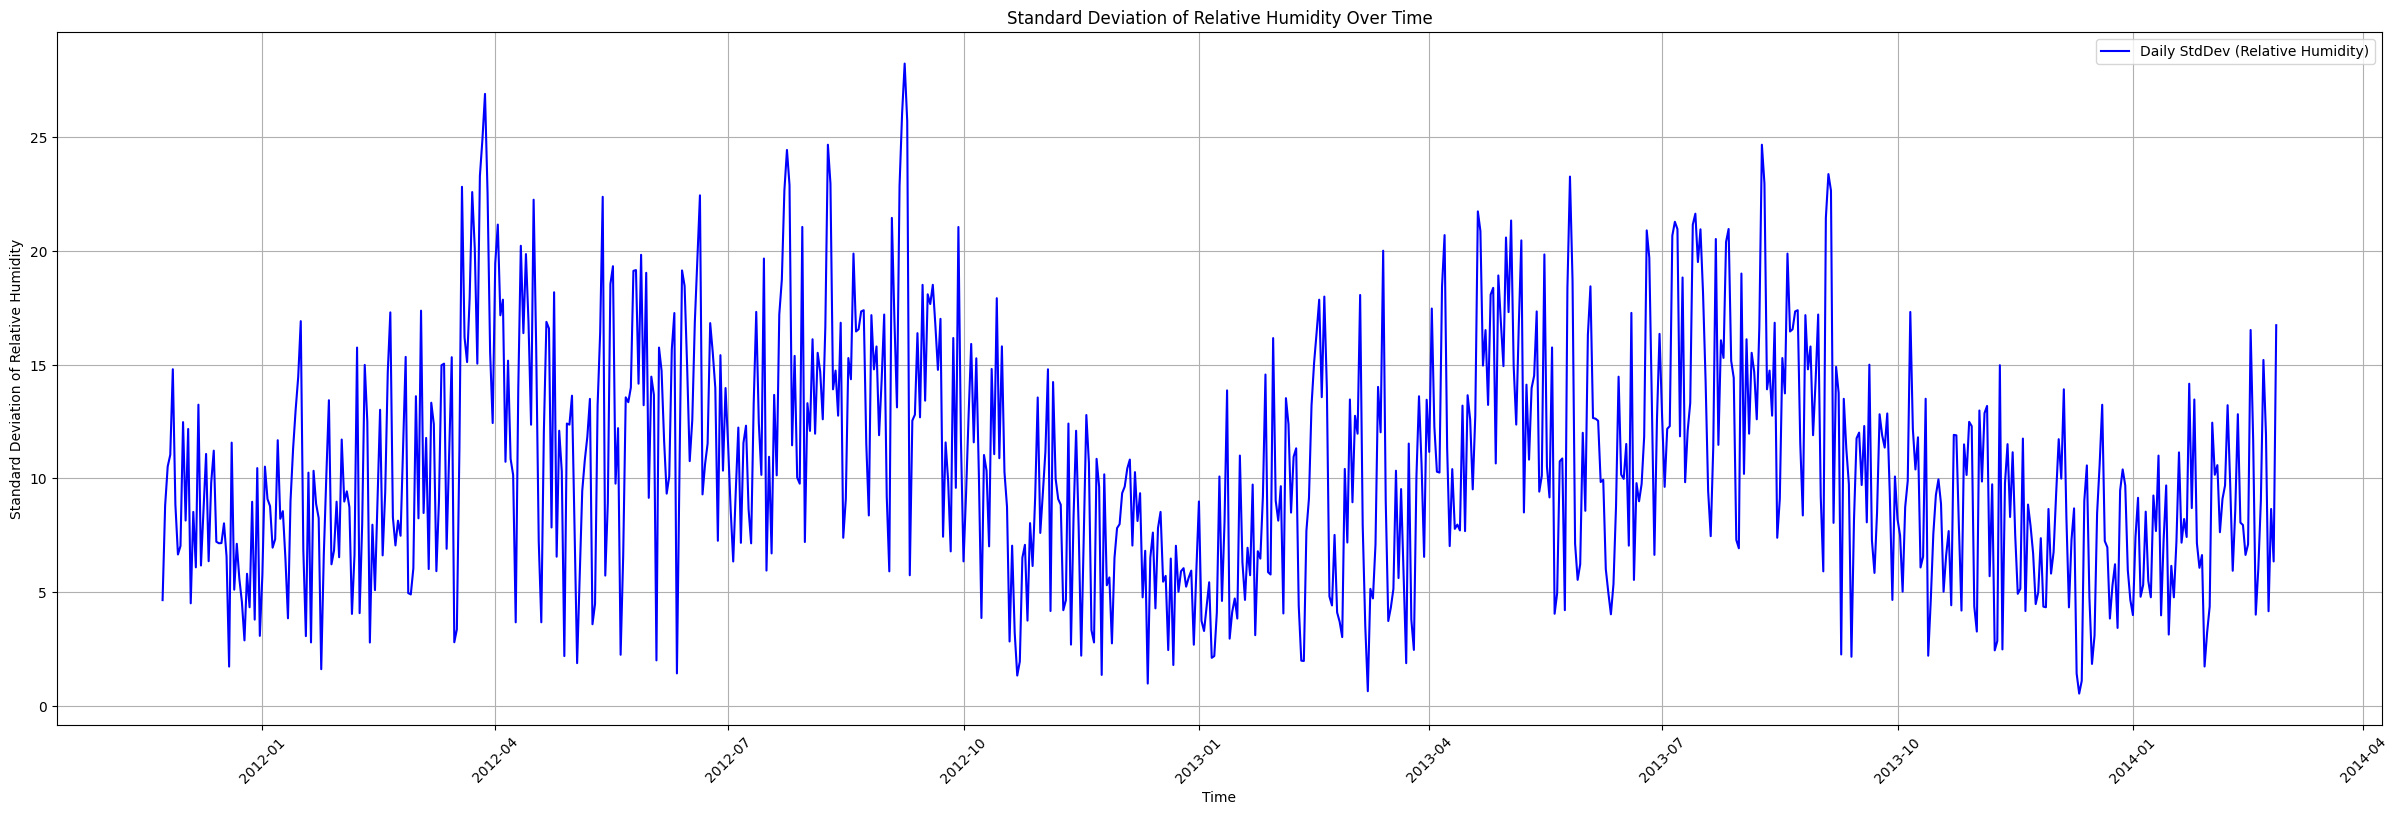

In [100]:
stdev_plotter.plot(parameter="rltv_hum", frequencies=["daily"])

## 2.5. Correlation

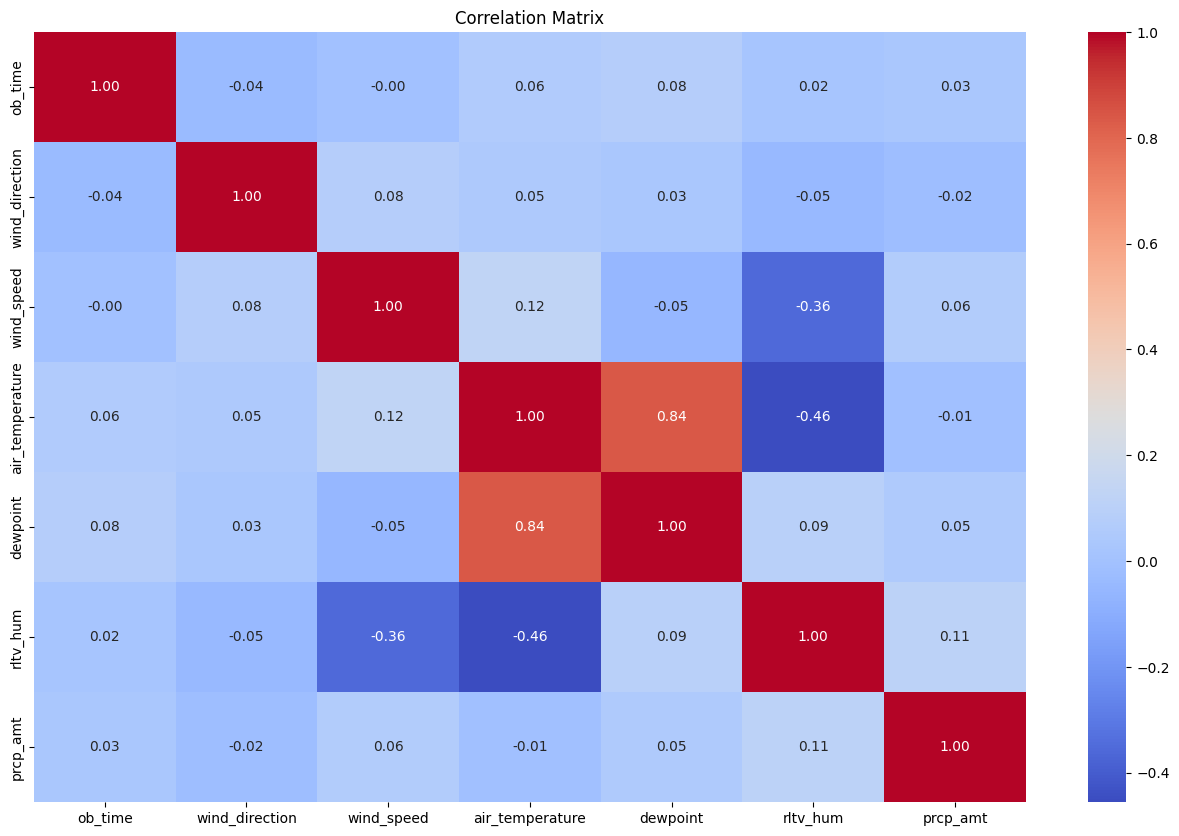

In [101]:
correlation_matrix = visual_df.corr()
plt.figure(figsize=(16, 10), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 2.6. Comparing Parameters

In [102]:
from scipy.stats import zscore

# Apply Z-score standardization to all numerical columns
scaled_df = cleaned_df.copy()
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns  # Select only numeric columns
scaled_df[numeric_cols] = cleaned_df[numeric_cols].apply(zscore)

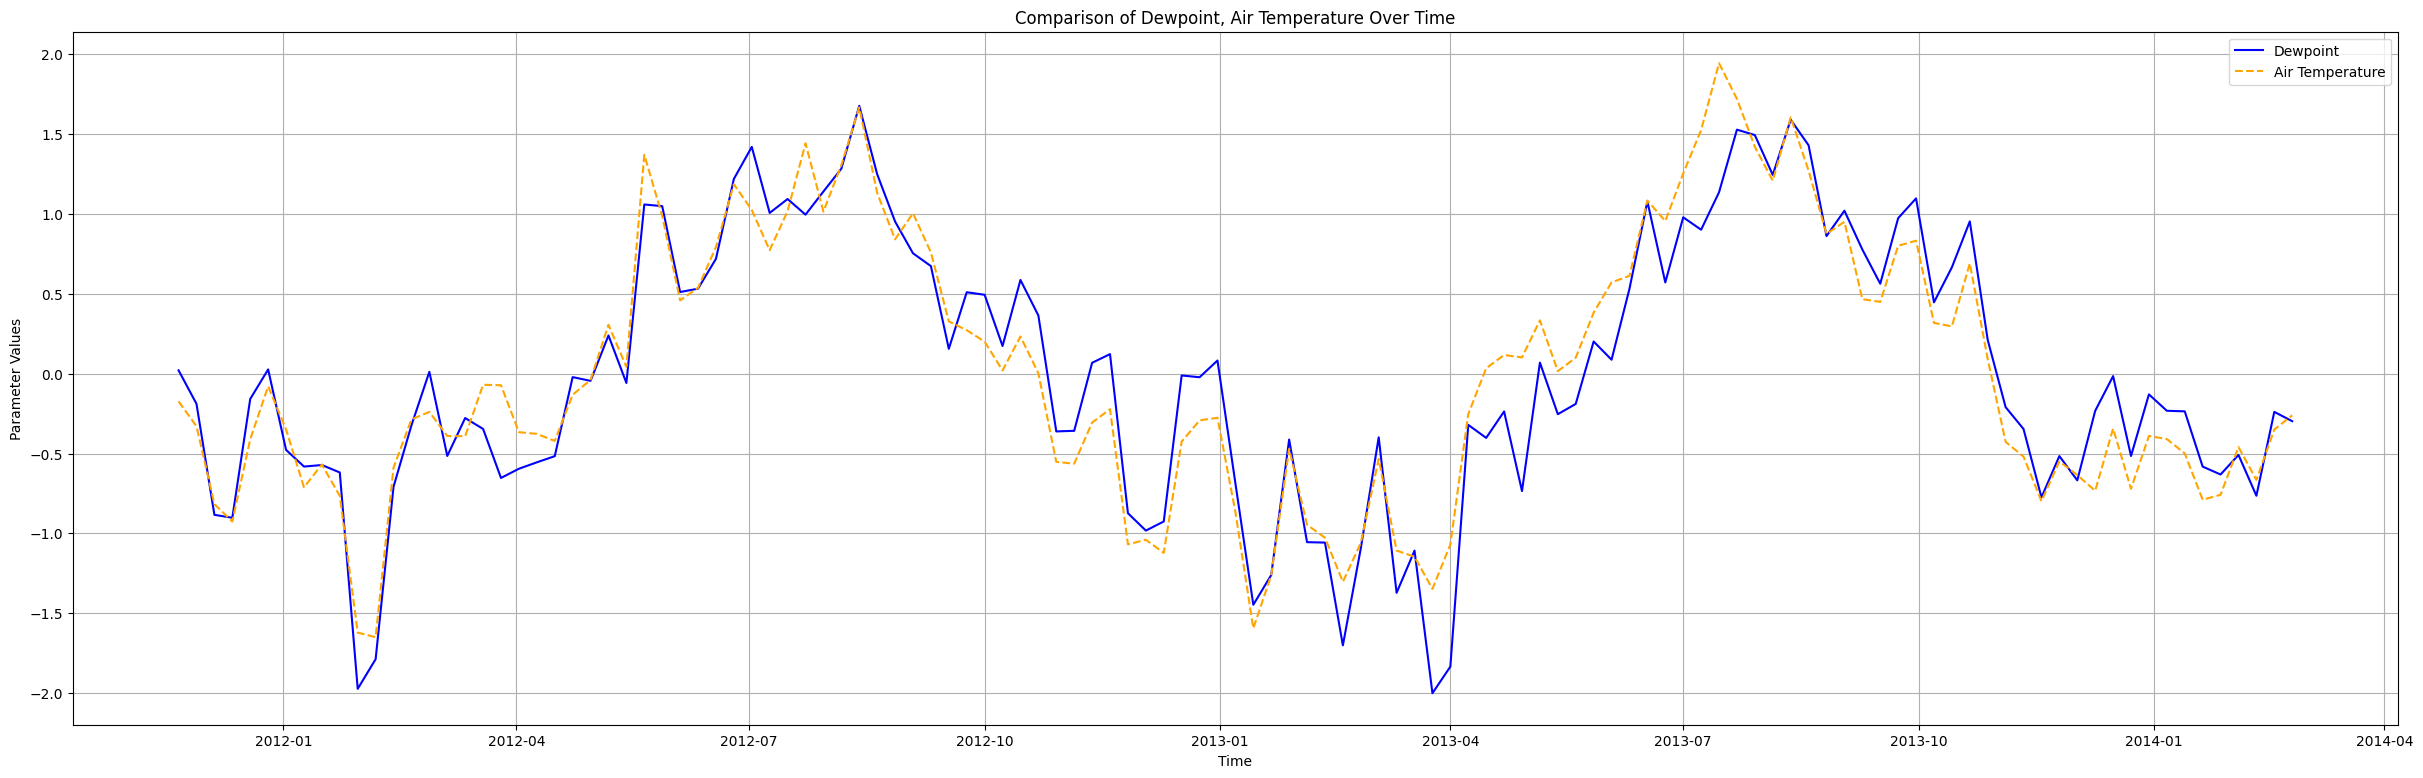

In [109]:
compare_parameters( "dewpoint", "air_temperature", df = scaled_df, frequency = "W")

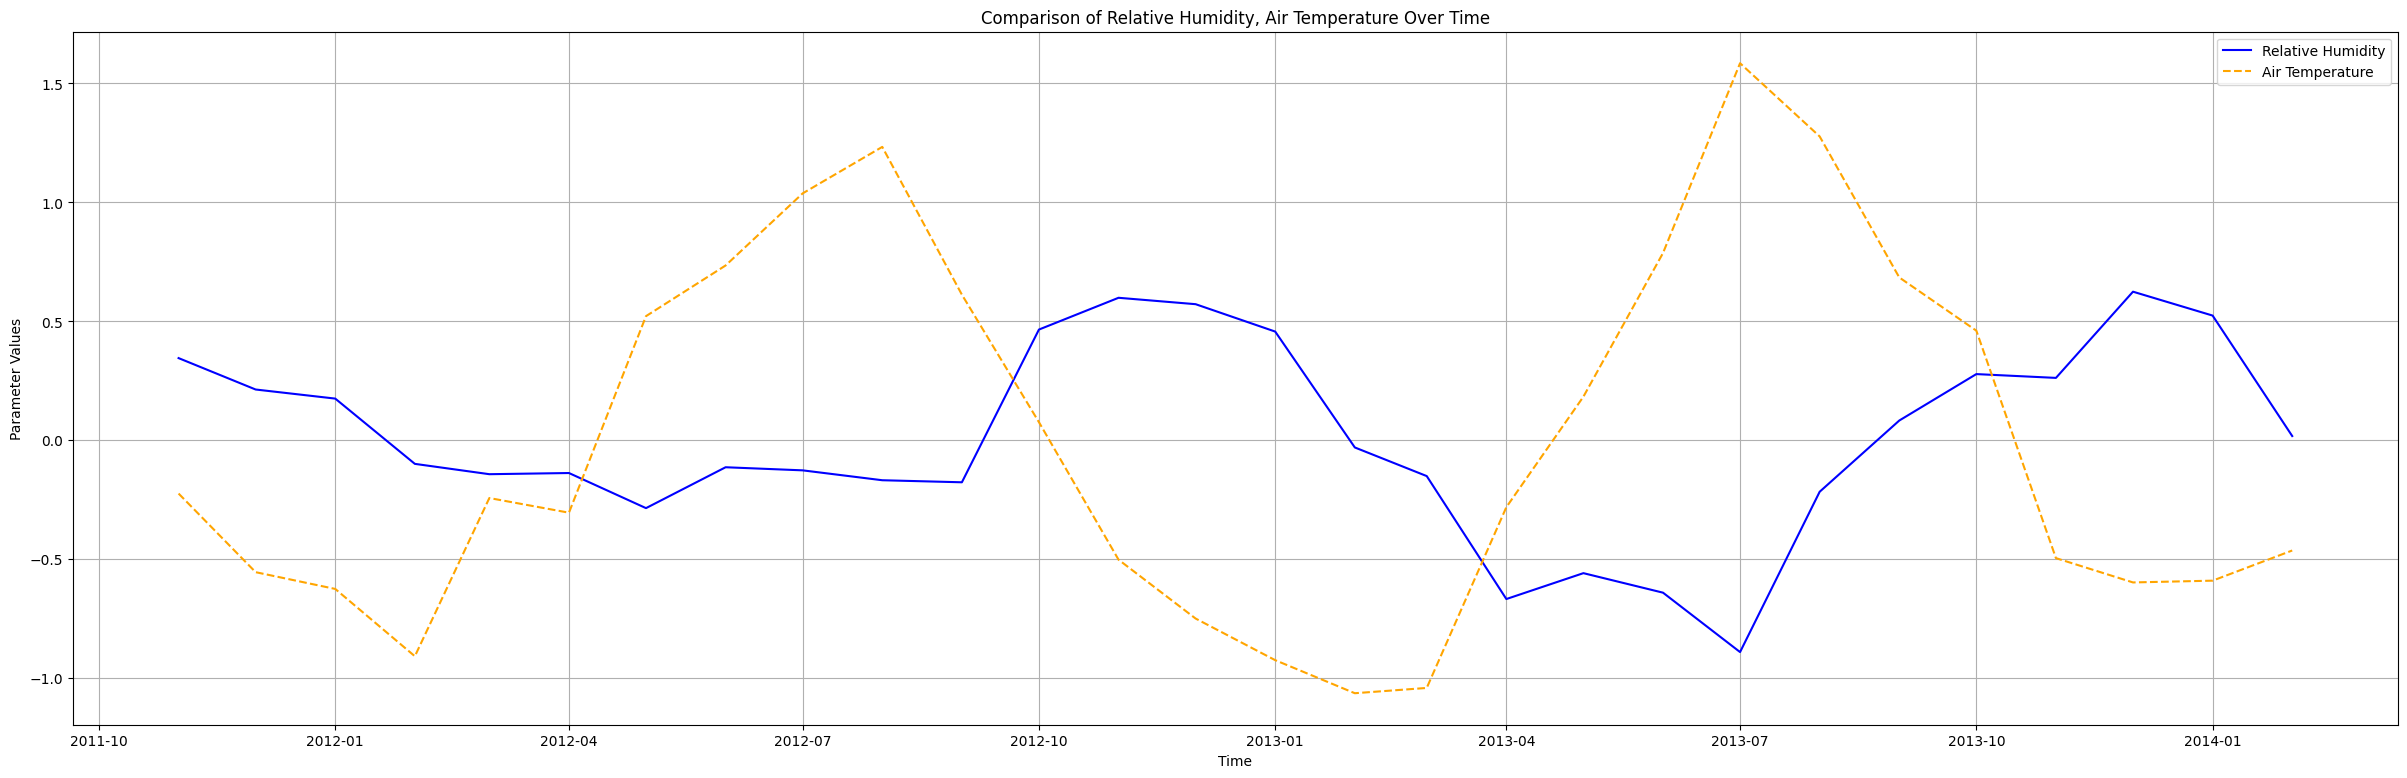

In [117]:
compare_parameters( "rltv_hum", "air_temperature", df = scaled_df, frequency = "M")

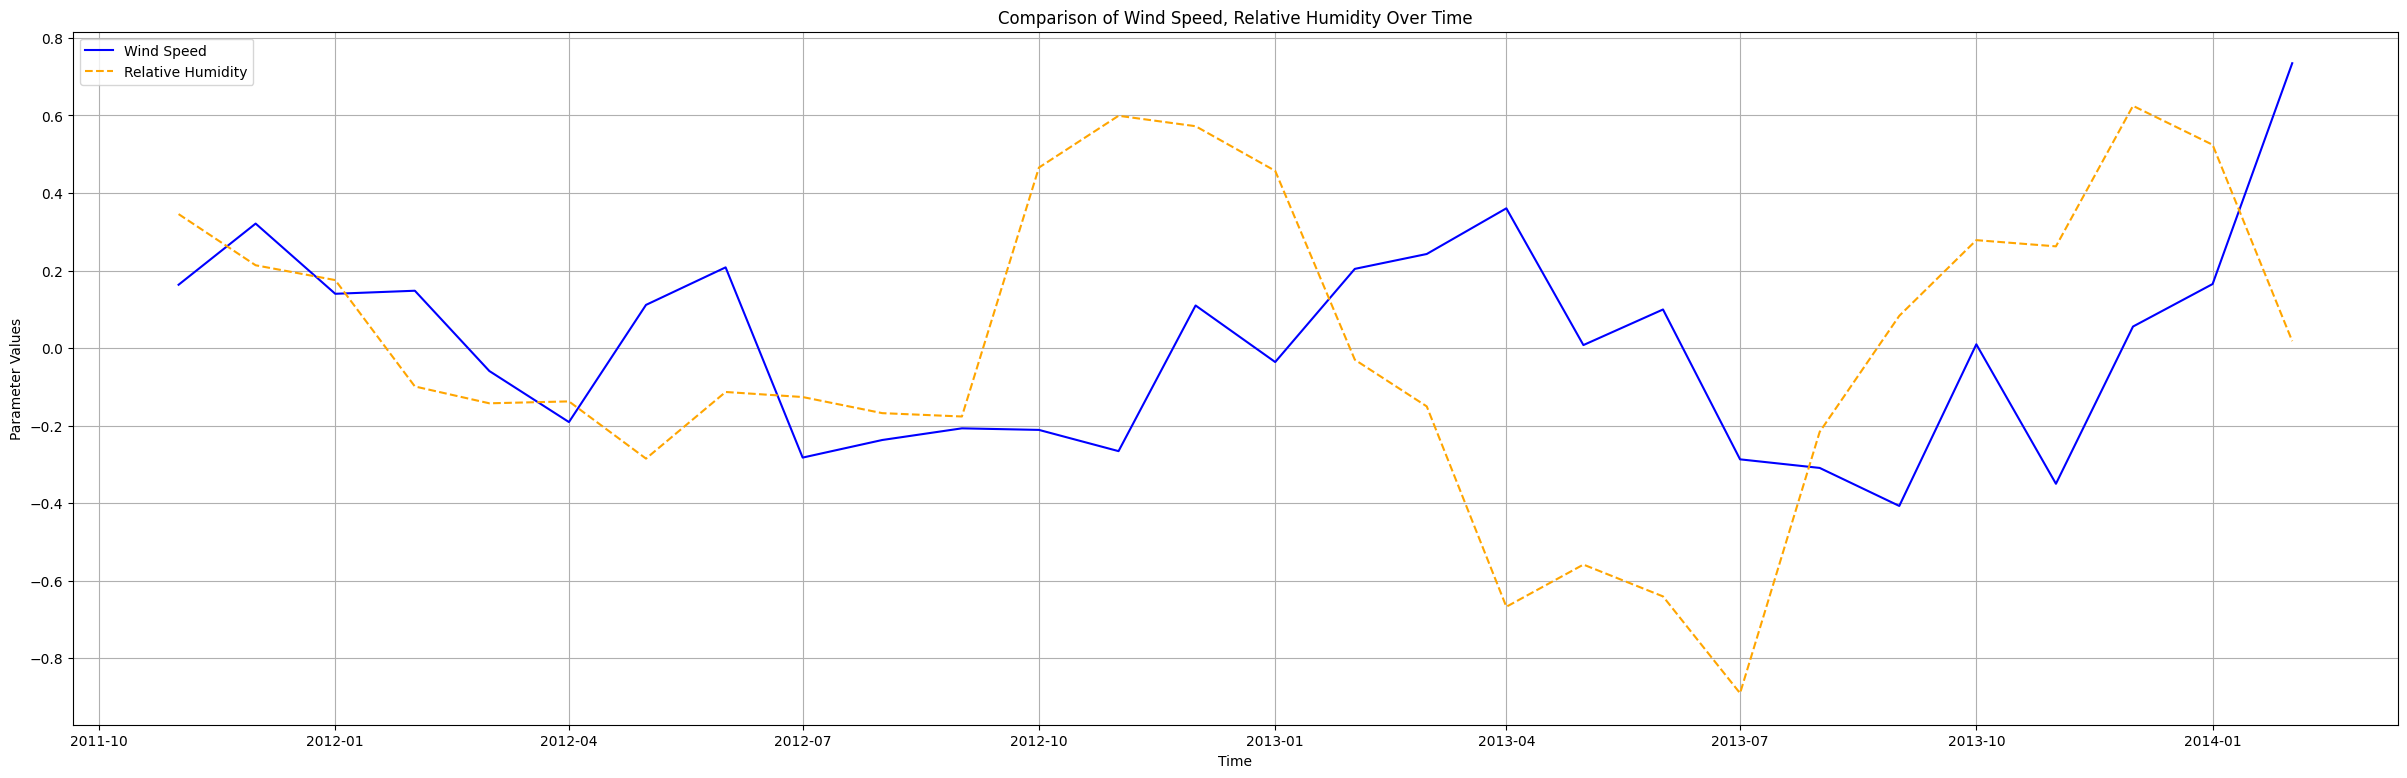

In [116]:
compare_parameters( "wind_speed", "rltv_hum", df = scaled_df, frequency = "M")

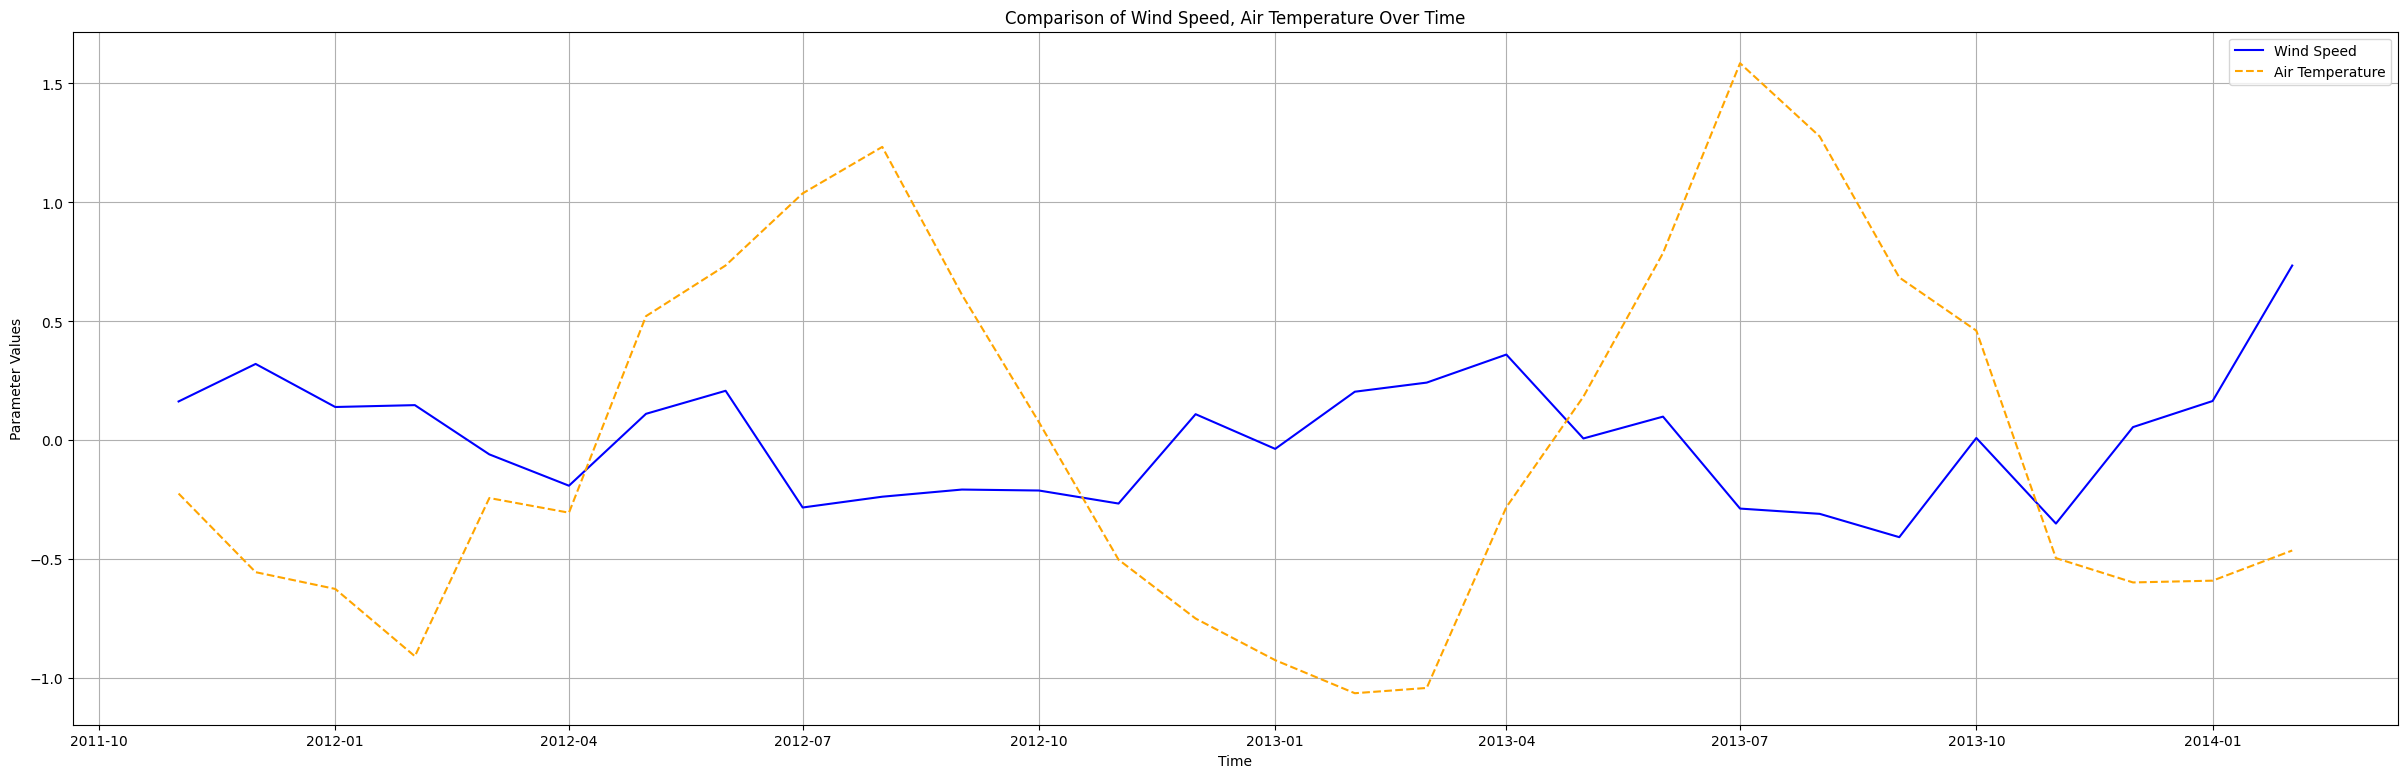

In [120]:
compare_parameters( "wind_speed", "air_temperature", df = scaled_df, frequency = "M")

## 2.7. Wind Speed and Direction

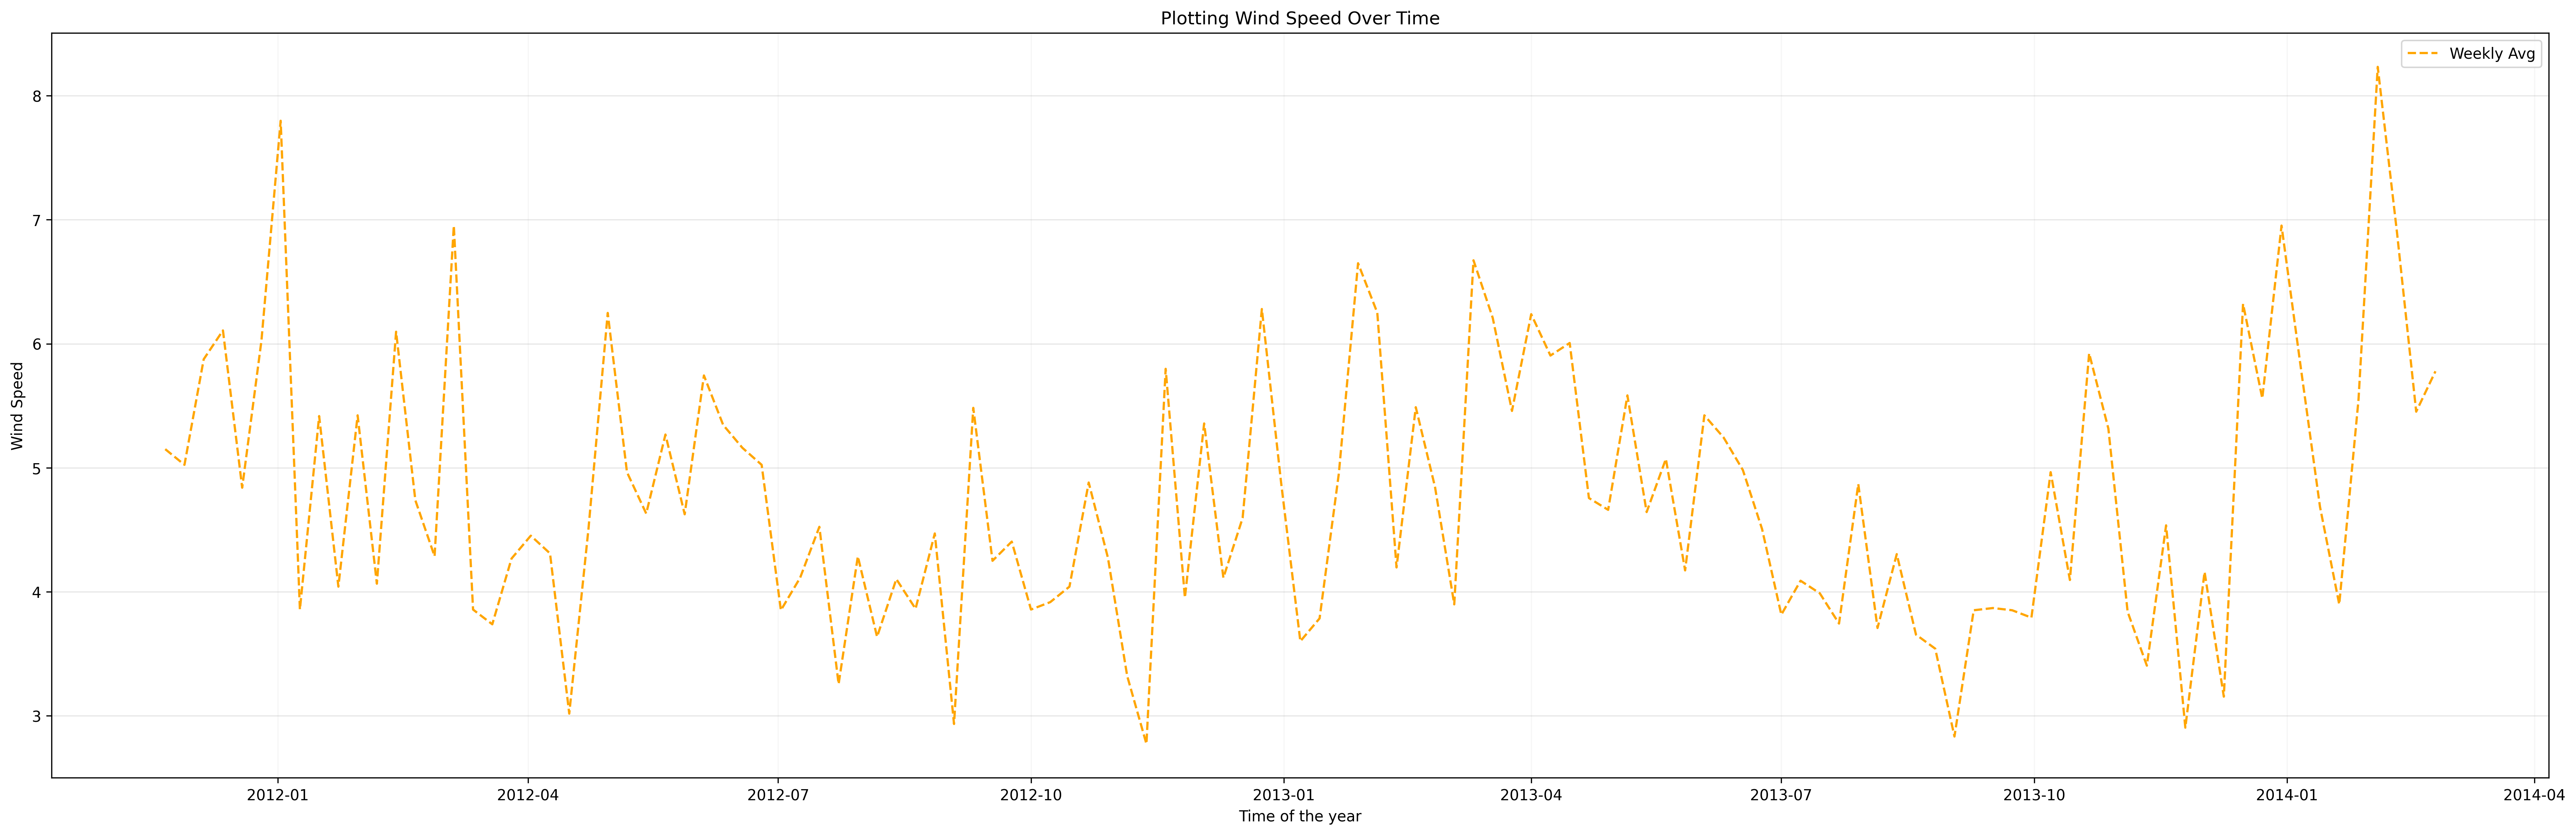

In [129]:
weather_plotter.plot(parameter="wind_speed", frequencies=["weekly"])

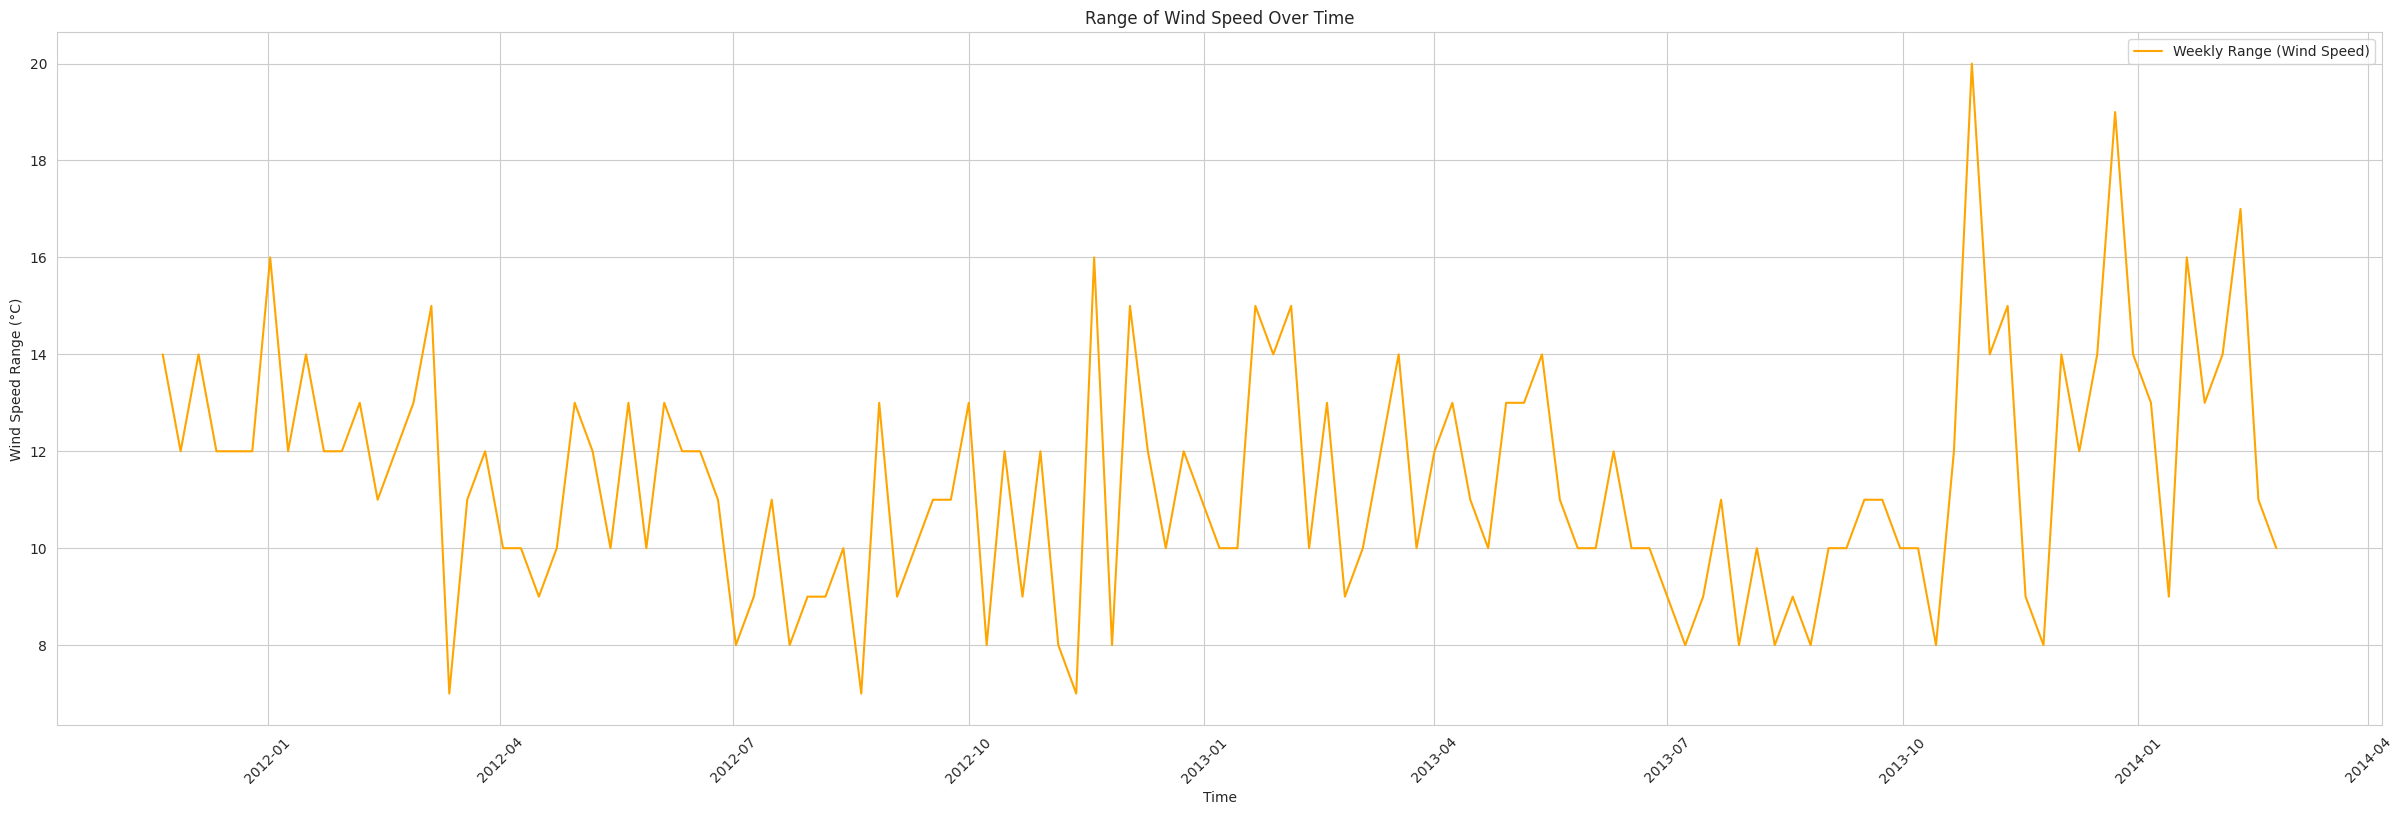

In [175]:
range_plotter.plot(parameter="wind_speed", frequencies=["weekly"])

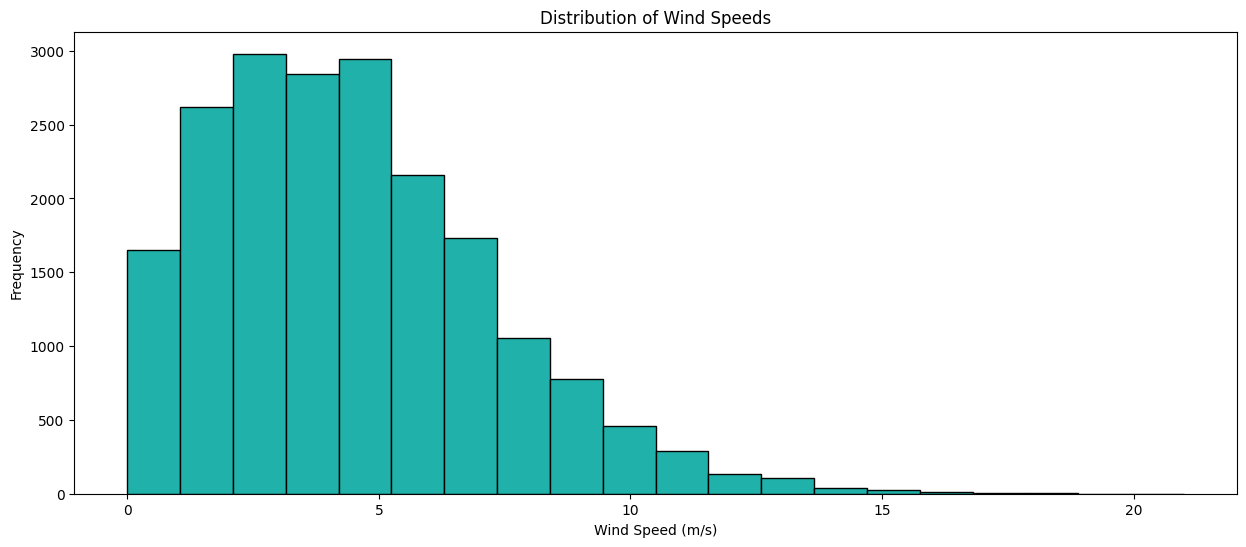

In [137]:
plt.figure(figsize=(15, 6))
plt.hist(visual_df['wind_speed'], bins=20, color='lightseagreen', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speeds')
plt.show()

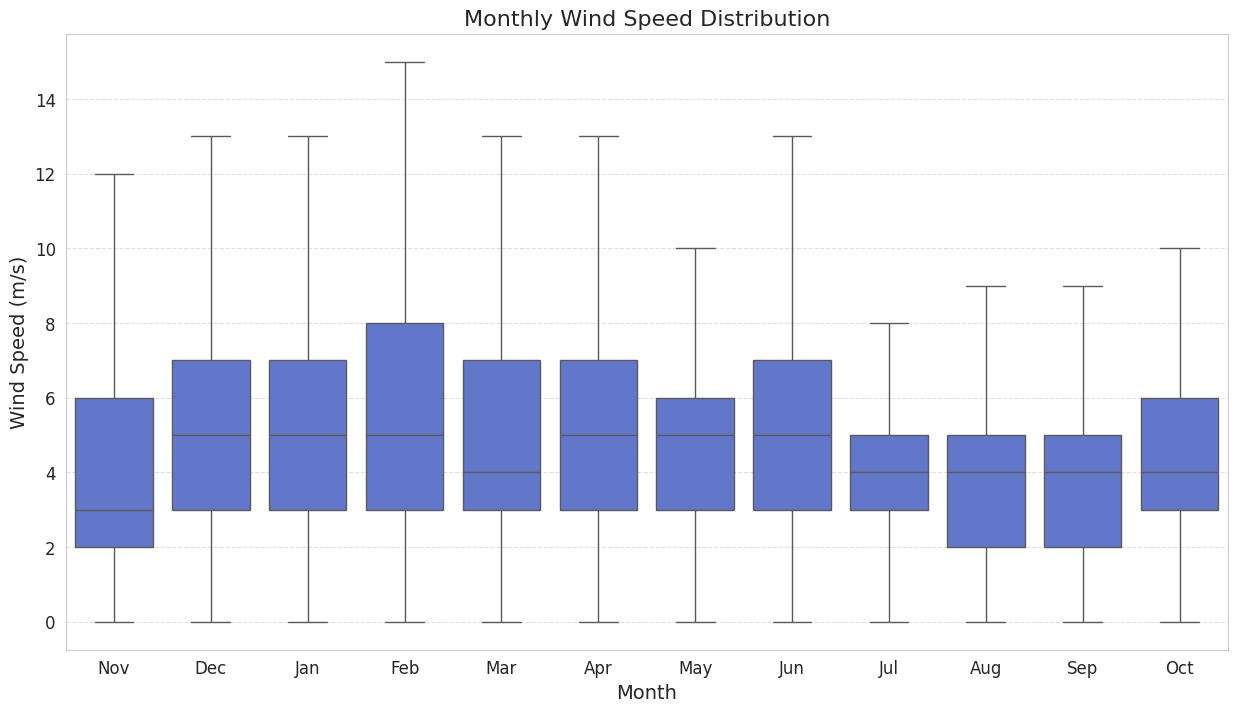

In [146]:
sns.set_style("whitegrid")

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
visual_df['month_name'] = visual_df['ob_time'].dt.month.map(lambda x: month_names[x-1])

# Set the palette globally
sns.set_palette(sns.color_palette("coolwarm", 12))

plt.figure(figsize=(15, 8))
sns.boxplot(x='month_name', y='wind_speed', data=visual_df, showfliers=False)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title('Monthly Wind Speed Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [147]:
!pip install windrose

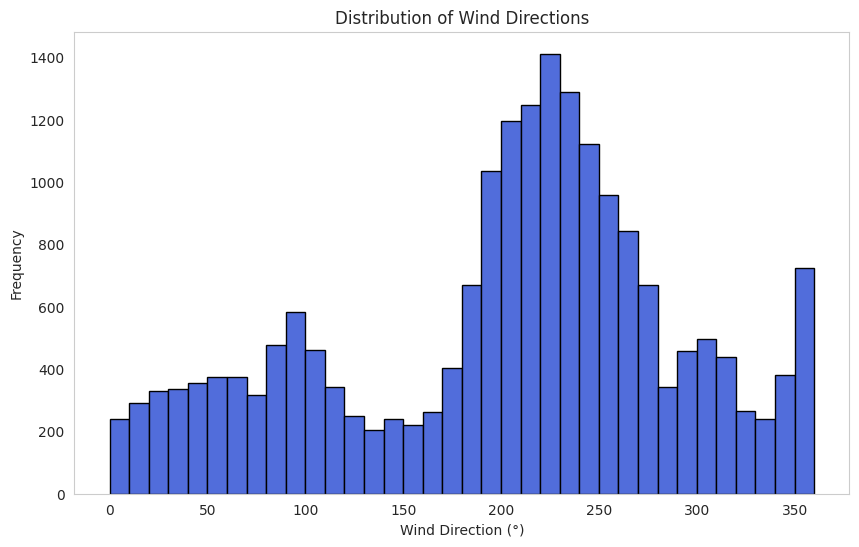

In [172]:
plt.figure(figsize=(10, 6))
plt.hist(visual_df["wind_direction"], bins=36, edgecolor='black')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Directions')
plt.grid(False)
plt.show()

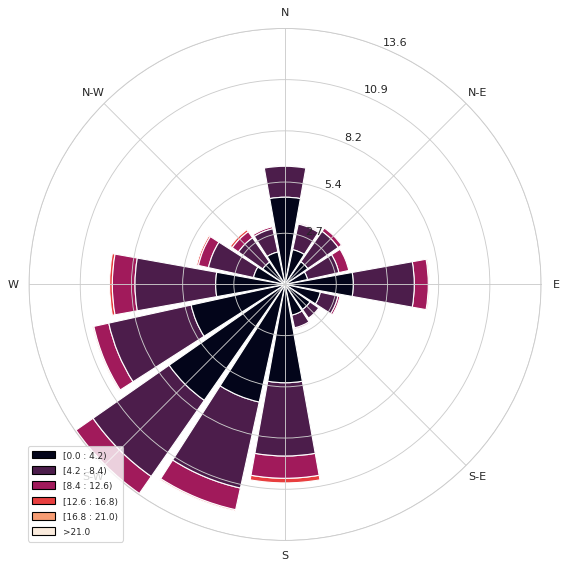

In [171]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(visual_df['wind_direction'], visual_df['wind_speed'], normed=True, opening=0.9, edgecolor='white')
ax.set_legend()
plt.show();